# #EDA

In [1]:
!pip install numpy==1.23.1
!pip install pandas==1.4.3
!pip install matplotlib==3.3.2
!pip install seaborn==0.11.0

  Using cached matplotlib-3.3.2.tar.gz (37.9 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for matplotlib
Failed to build matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
  Running setup.py install for matplotlib: started
  Running setup.py install for matplotlib: finished with status 'error'
  Rolling back uninstall of matplotlib
  Moving to c:\users\hp\anaconda3\lib\site-packages\__pycache__\pylab.cpython-39.pyc
   from C:\Users\HP\AppData\Local\Temp\pip-uninstall-jqr4lpvj\pylab.cpython-39.pyc
  Moving to c:\users\hp\anaconda3\lib\site-packages\matplotlib-3.5.2-py3.9-nspkg.pth
   from C:\Users\HP\AppData\Local\Temp\pip-uninstall-26flxq9g\matplotlib-3.5.2-py3.9-nspkg.pth
  Moving to c:\users\hp\anaconda3\lib\site-packages\matplotlib-3.5.2.dist-info\
   from C:\Users\HP\anac

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [573 lines of output]
  
  Edit setup.cfg to change the build options; suppress output with --quiet.
  
  BUILDING MATPLOTLIB
    matplotlib: yes [3.3.2]
        python: yes [3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit
                    (AMD64)]]
      platform: yes [win32]
   sample_data: yes [installing]
         tests: no  [skipping due to configuration]
        macosx: no  [Mac OS-X only]
  
  C:\Users\HP\anaconda3\lib\site-packages\setuptools\dist.py:286: SetuptoolsDeprecationWarning: The namespace_packages parameter is deprecated, consider using implicit namespaces instead (PEP 420).
    warnings.warn(msg, SetuptoolsDeprecationWarning)
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  copying lib\pylab.py -> build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\matp

In [2]:
# Importing the libraries 

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier
from time import time
from IPython.display import display
from sklearn.metrics import accuracy_score, fbeta_score, roc_curve, auc, roc_auc_score
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.patches as mpatche
from sklearn import metrics

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time 
import re

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading the data
data= pd.read_excel('news_share_data.xlsx')
print(data.shape)
data.head()

(1003, 22)


article_id                                              title  \
0     7014291                 It's Time for a YouTube Competitor   
1     7014327  The Ultimate Roundup of 2014's Biggest April F...   
2     7014304  A Selfie and One Garish Jacket: How the Red So...   
3     7031995    African Telecom Proposes More Diverse Emoticons   
4     6541359  Google to Launch Improved Android Camera App, ...   

                                                text published_date  \
0  It was reported last week that Yahoo is gettin...     2014-03-31   
1  April Fools' marks the day when pranking goes ...     2014-04-01   
2  The 2013 World Series champion Boston Red Sox ...     2014-04-01   
3  Less than a week after Apple pledged to make i...     2014-04-01   
4  Android users may soon see a series of new fea...     2014-04-01   

   unique_tokens_rate  num_hrefs  num_imgs  num_videos  average_token_length  \
0            0.640816          5         3           1              4.579592   
1            0.549618          4         1           0              4.636704   
2            0.577236          8         1           0              4.627451   
3            0.525896          4         1           0              5.083665   
4            0.588889          6         9           0              4.336022   

   num_keywords data_channel  min_avg_key  max_avg_key  avg_avg_key  \
0             5     Business     1459.500     4817.692     3370.415   
1             7         Tech        0.000     3581.094     2556.367   
2             7         Tech     2270.889     3852.800     3018.167   
3             9         Tech        0.000     3581.094     1871.403   
4             7        00000     3581.094     8453.451     5155.323   

   href_avg_shares  global_subjectivity  global_sentiment_polarity  \
0         1833.333             0.403762                   0.038762   
1         8500.000             0.410707                   0.180934   
2         2076.333             0.397545                   0.044864   
3         2200.000             0.491578                   0.157620   
4          805.000             0.628535                   0.078497   

   global_rate_positive_words  global_rate_negative_words  title_subjectivity  \
0                    0.036735                    0.024490                0.25   
1                    0.044944                    0.003745                0.00   
2                    0.035294                    0.019608                0.00   
3                    0.047809                    0.011952                0.00   
4                    0.053763                    0.034946                0.00   

   title_sentiment_polarity  shares  
0                      0.25    1600  
1                      0.00    1500  
2                      0.00    1400  
3                      0.00    1300  
4                      0.00    3000

In [5]:
df = data.copy()

In [6]:
# Max/Min values at each of the column
df.describe()

article_id  unique_tokens_rate    num_hrefs     num_imgs  \
count  1.003000e+03         1003.000000  1003.000000  1003.000000   
mean   6.915159e+06            0.526890    11.720837     5.188435   
std    4.823885e+05            0.118793    15.181597     8.495002   
min    2.195051e+06            0.000000     0.000000     0.000000   
25%    7.006102e+06            0.466751     4.000000     1.000000   
50%    7.013065e+06            0.533118     8.000000     2.000000   
75%    7.027570e+06            0.596615    14.000000     7.000000   
max    7.041291e+06            0.867925   162.000000    84.000000   

        num_videos  average_token_length  num_keywords  min_avg_key  \
count  1003.000000           1003.000000   1003.000000  1003.000000   
mean      1.215354              4.603757      7.206381  1131.437972   
std       4.079730              0.701756      1.856713  1181.134621   
min       0.000000              0.000000      2.000000     0.000000   
25%       0.000000              4.490363      6.000000     0.000000   
50%       0.000000              4.685484      7.000000   984.066700   
75%       1.000000              4.855388      9.000000  2116.714500   
max      51.000000              7.218430     10.000000  3613.040000   

         max_avg_key   avg_avg_key  href_avg_shares  global_subjectivity  \
count    1003.000000   1003.000000      1003.000000          1003.000000   
mean     6463.258234   3359.478830     13518.302031             0.446724   
std      7455.421154   1467.674637     51499.106509             0.109167   
min      3568.870000   1360.101000         0.000000             0.000000   
25%      3613.040000   2533.297000      1300.000000             0.395575   
50%      4635.807000   3004.755000      2766.667000             0.455990   
75%      6561.910000   3809.005000      7341.000000             0.509508   
max    102200.000000  17604.270000    663600.000000             0.875000   

       global_sentiment_polarity  global_rate_positive_words  \
count                1003.000000                 1003.000000   
mean                    0.106187                    0.038169   
std                     0.092496                    0.015673   
min                    -0.300000                    0.000000   
25%                     0.051911                    0.028655   
50%                     0.102579                    0.037325   
75%                     0.163183                    0.046922   
max                     0.489623                    0.120805   

       global_rate_negative_words  title_subjectivity  \
count                 1003.000000         1003.000000   
mean                     0.017772            0.292537   
std                      0.010557            0.325227   
min                      0.000000            0.000000   
25%                      0.011224            0.000000   
50%                      0.016266            0.200000   
75%                      0.022597            0.500000   
max                      0.103030            1.000000   

       title_sentiment_polarity         shares  
count               1003.000000    1003.000000  
mean                   0.057536    4247.304088  
std                    0.266609   22609.634435  
min                   -1.000000      58.000000  
25%                    0.000000    1000.000000  
50%                    0.000000    1600.000000  
75%                    0.150000    3100.000000  
max                    1.000000  663600.000000

In [7]:
df.shape

(1003, 22)

In [8]:
# Columns present in the dataset
df.columns

Index(['article_id', 'title', 'text', 'published_date', 'unique_tokens_rate',
       'num_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel', 'min_avg_key', 'max_avg_key',
       'avg_avg_key', 'href_avg_shares', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'title_subjectivity',
       'title_sentiment_polarity', 'shares'],
      dtype='object')

In [9]:
df.isna().sum().sort_values(ascending=False)

article_id                    0
title                         0
title_sentiment_polarity      0
title_subjectivity            0
global_rate_negative_words    0
global_rate_positive_words    0
global_sentiment_polarity     0
global_subjectivity           0
href_avg_shares               0
avg_avg_key                   0
max_avg_key                   0
min_avg_key                   0
data_channel                  0
num_keywords                  0
average_token_length          0
num_videos                    0
num_imgs                      0
num_hrefs                     0
unique_tokens_rate            0
published_date                0
text                          0
shares                        0
dtype: int64

In [10]:
# Unique values of each of the column
print('Unique Values - ')
for col in df:
    print(col,':',df[col].unique(), '\n')

Unique Values - 
article_id : [7014291 7014327 7014304 ... 7003024 7002995 7003062] 

title : ["It's Time for a YouTube Competitor"
 "The Ultimate Roundup of 2014's Biggest April Fools' Day Pranks"
 'A Selfie and One Garish Jacket: How the Red Sox Won the White House' ...
 "'The Amazing Spider-Man 2' Hosts First Google Hangout With Movie Stuff for Sale"
 'How 2 Animators Independently Recreated Pixar Magic'
 "Not in 'Twilight' Anymore: Robert Pattinson Battles Lawless Outback in 'The Rover'"] 

text : ['It was reported last week that Yahoo is getting into the online video business by courting YouTube stars and networks. The move could mark one of the biggest challenges to YouTube\'s audience dominance and create serious competition in the online video world.\n\n[seealso slug="20-second-youtube-videos/"]\n\nAs of September 2013, more than 17% of all Internet traffic was going to YouTube. The only site to have more traffic than that was another streaming video behemoth -- Netflix. With s

In [11]:
#Understanding target variable distribution
df['shares'].describe()

count      1003.000000
mean       4247.304088
std       22609.634435
min          58.000000
25%        1000.000000
50%        1600.000000
75%        3100.000000
max      663600.000000
Name: shares, dtype: float64

<AxesSubplot:>

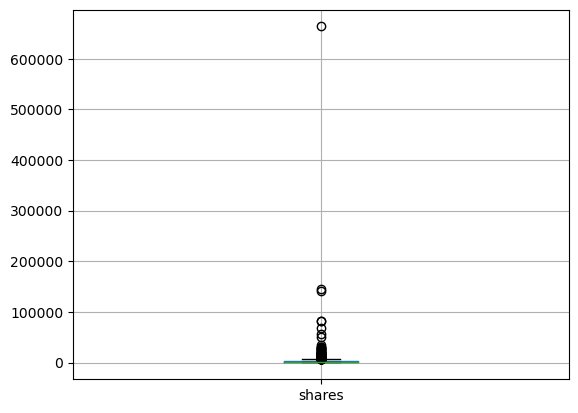

In [12]:
#Understanding target variable distribution
df.boxplot(column='shares')

In [13]:
# Quantiles 
df['shares'].quantile(q=[.1, .2, .3, .4, .5, .6, .7, .8, .9,1.0])

0.1       778.4
0.2       940.8
0.3      1100.0
0.4      1300.0
0.5      1600.0
0.6      2000.0
0.7      2600.0
0.8      3800.0
0.9      6680.0
1.0    663600.0
Name: shares, dtype: float64

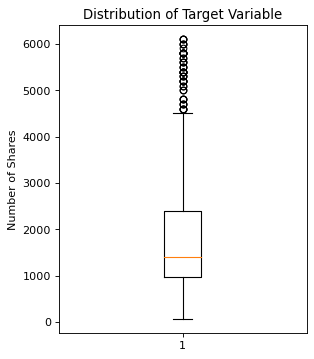

In [14]:
# Filtering data to show the boxplot 
figure(figsize=(4, 5), dpi=80)
plt.ylabel(ylabel='Number of Shares')
plt.boxplot(df[df['shares'] <=6100]['shares'])
plt.title("Distribution of Target Variable")
plt.show()
plt.savefig('Distribution_Shares.png')

<Figure size 640x480 with 0 Axes>

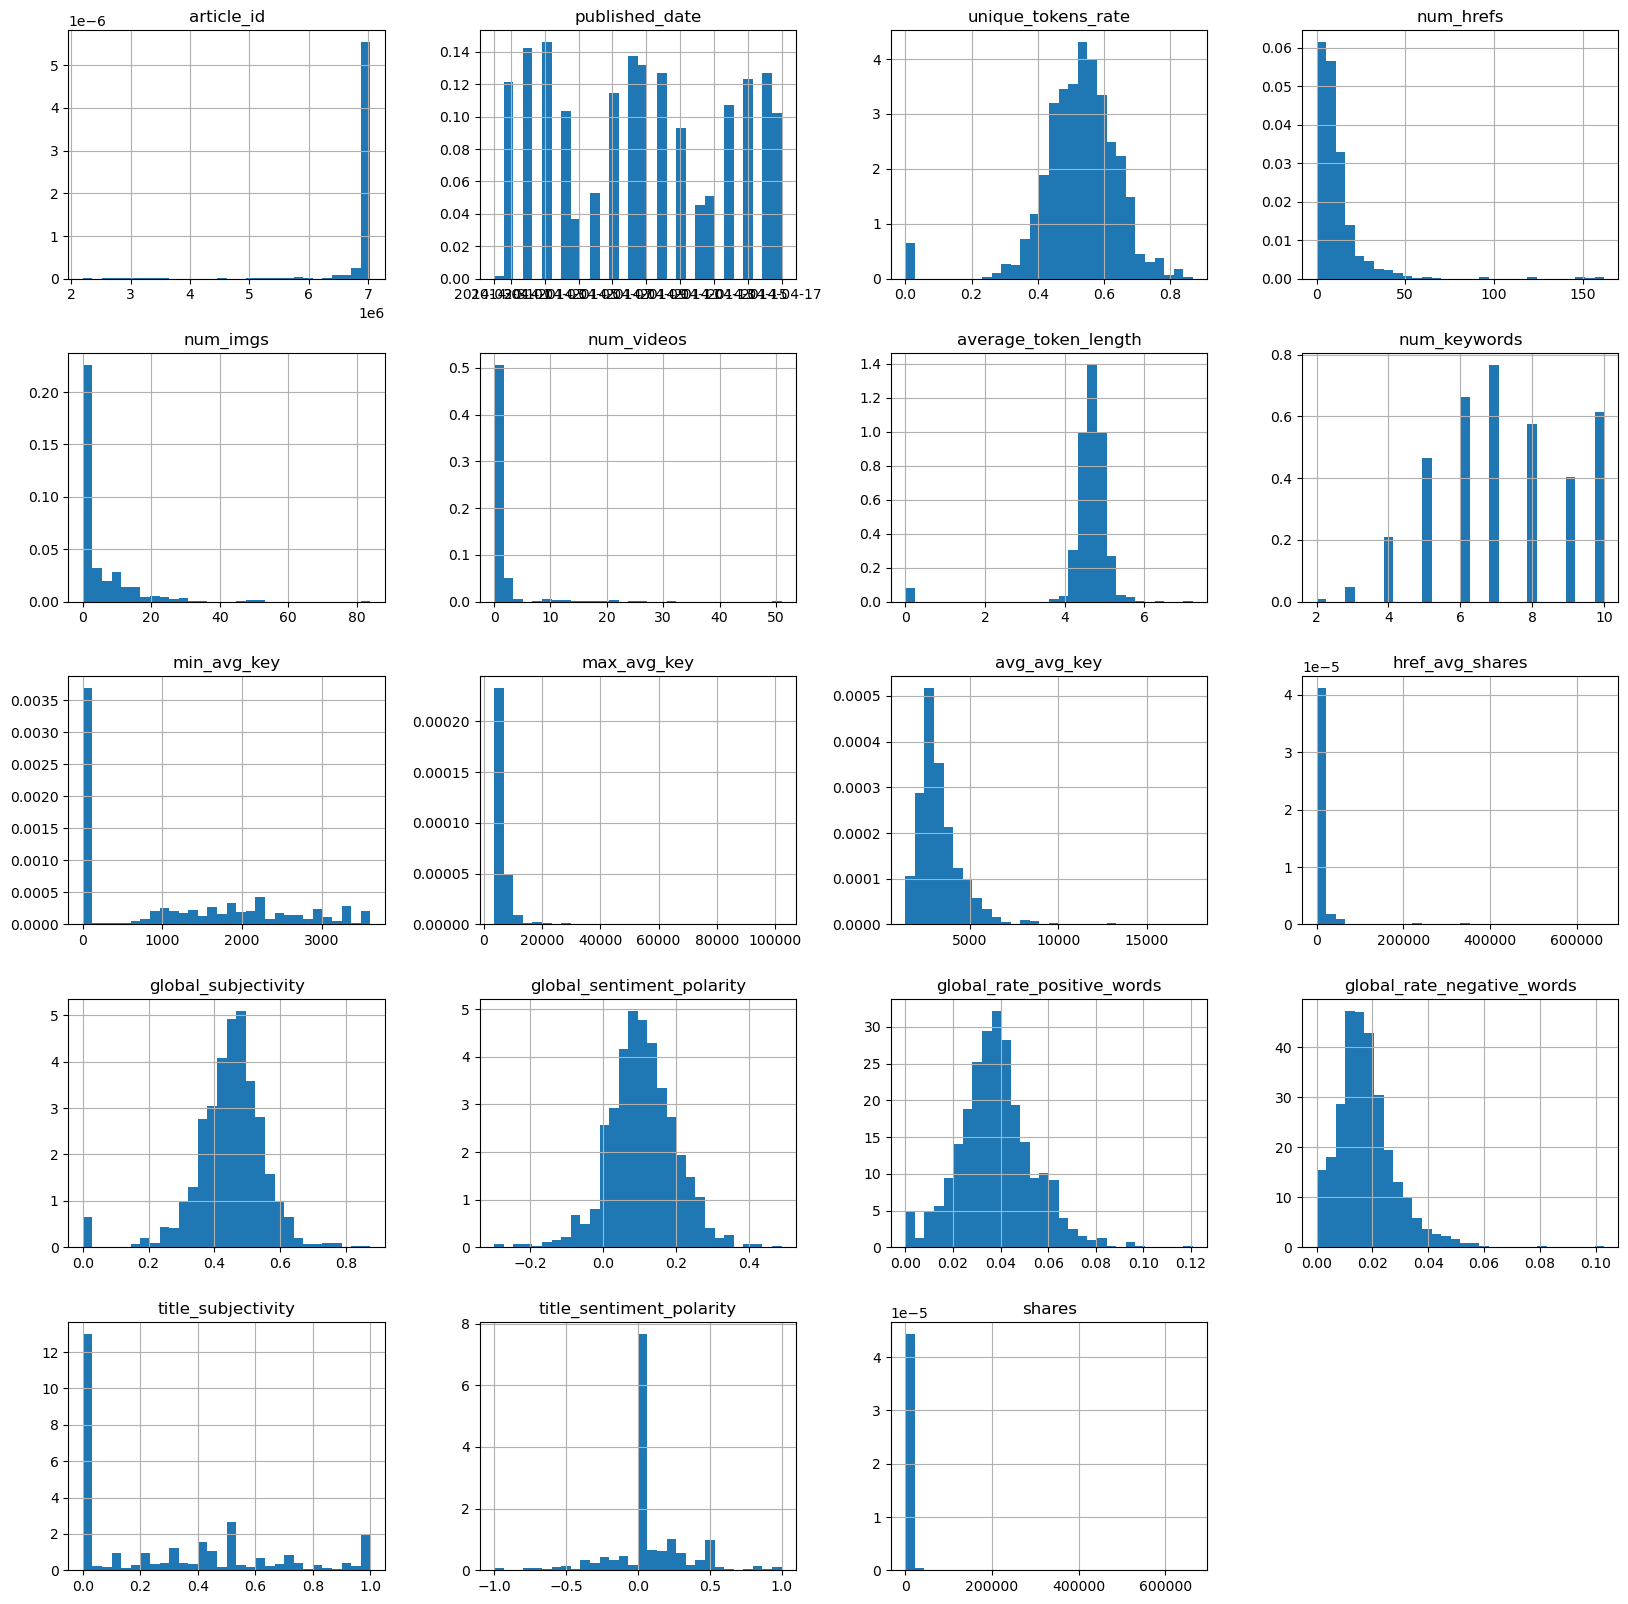

In [15]:
#Visualize the variable distribution with histograms
#It is seen the that the distribution of the dataset is Right skewed
df.hist(bins=30, figsize=(20,20), density=True)
plt.show()

In [16]:
df['shares_2'] = df['shares'].apply(lambda x: 0 if x <1500 else 1)

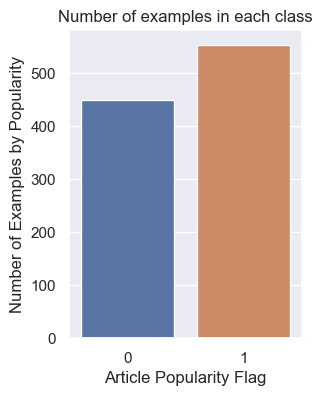

In [17]:
sns.set(rc={'figure.figsize':(3,4)})
ax=sns.countplot(df['shares_2'])
ax.set(xlabel='Article Popularity Flag', ylabel='Number of Examples by Popularity')
plt.title('Number of examples in each class')
plt.show()

In [18]:
# Creating multiclass of Output variable 

conditions = [
    (df['shares'] < 500),
    (df['shares'] < 950), 
    (df['shares'] < 4000),
    (df['shares'] < 30000),
    (df['shares'] < 943300)
    ]

values = ['very_low','low','medium','high', 'very_high']

df['shares_4'] = np.select(conditions, values)

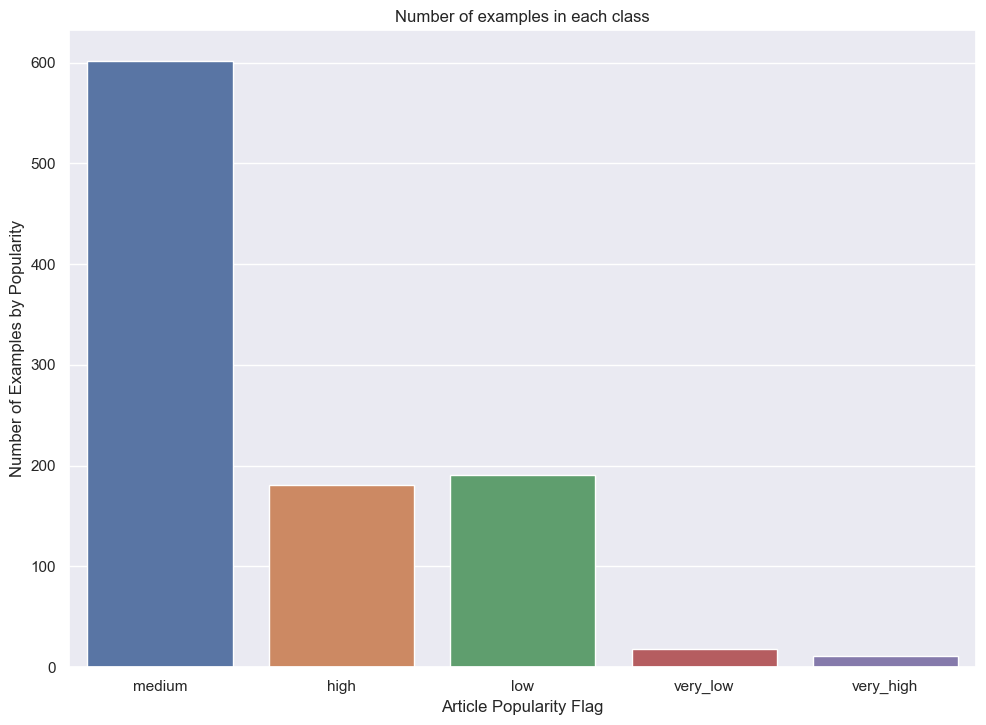

In [19]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax=sns.countplot(df['shares_4'])
ax.set(xlabel='Article Popularity Flag', ylabel='Number of Examples by Popularity')
plt.title('Number of examples in each class')
plt.show()

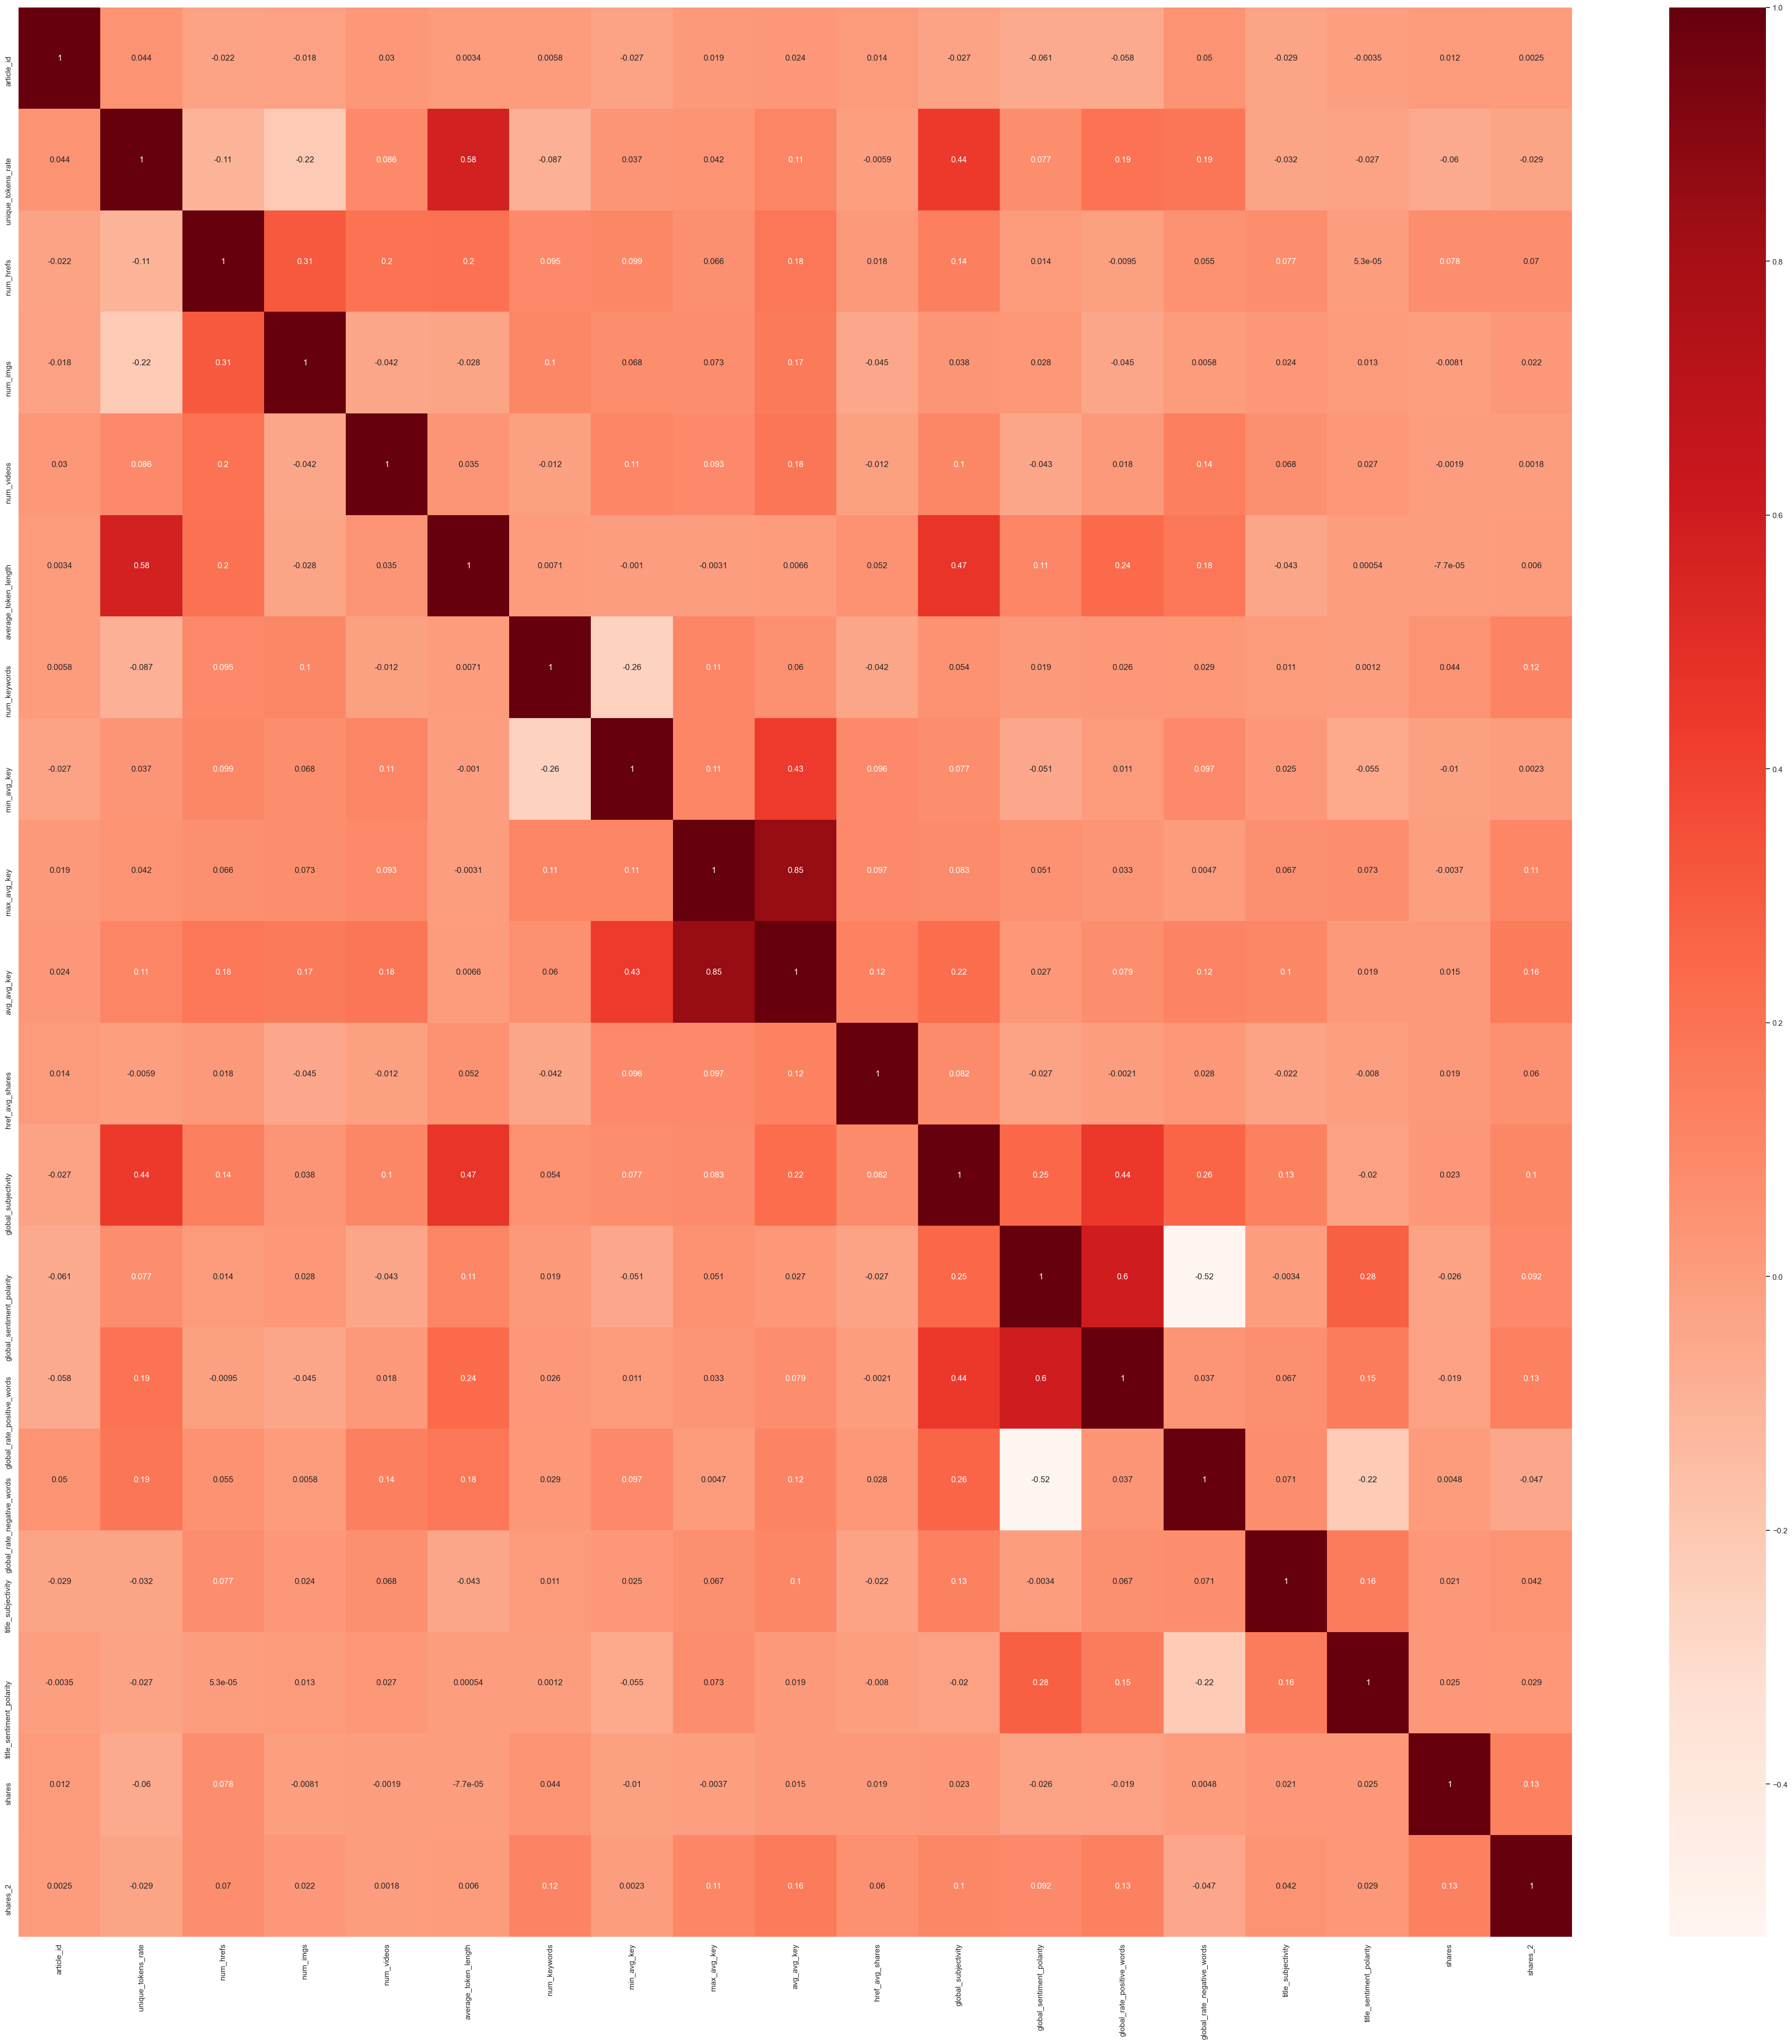

In [20]:
plt.figure(figsize=(50,50))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

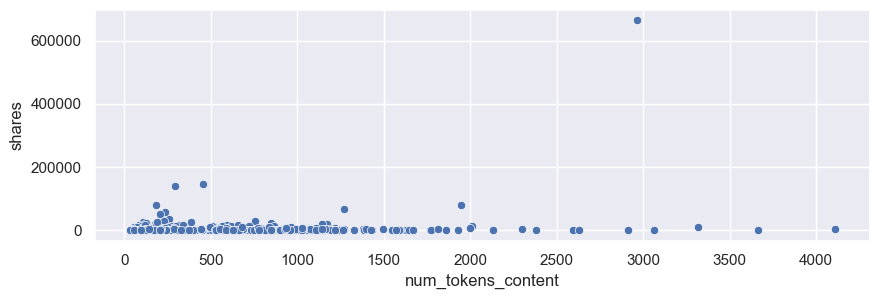

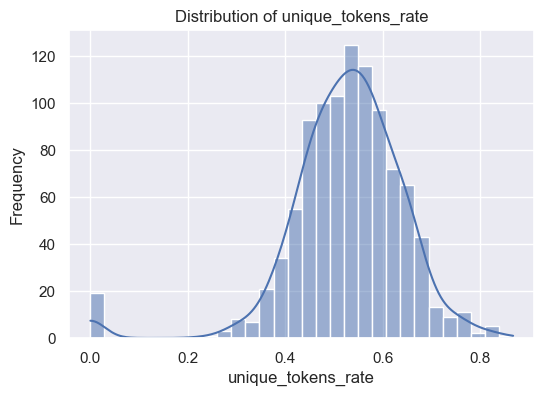

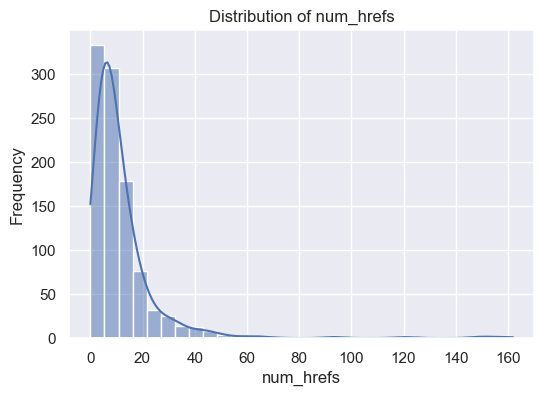

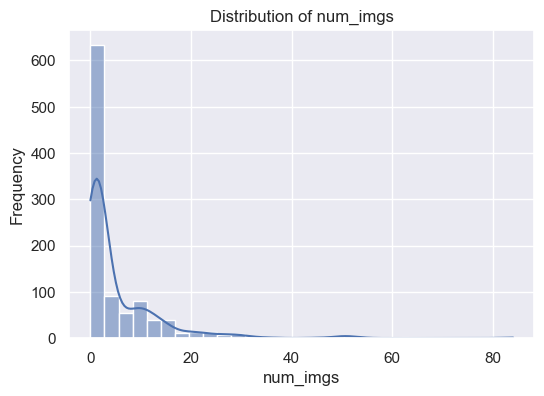

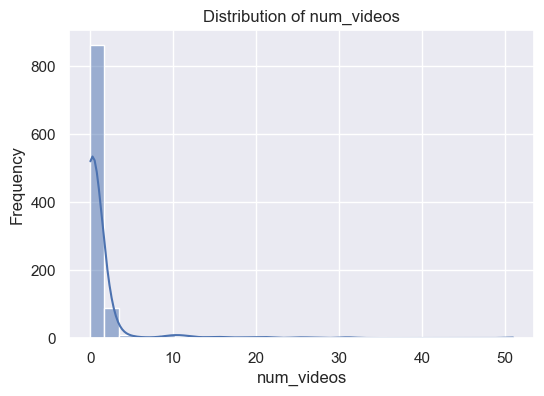

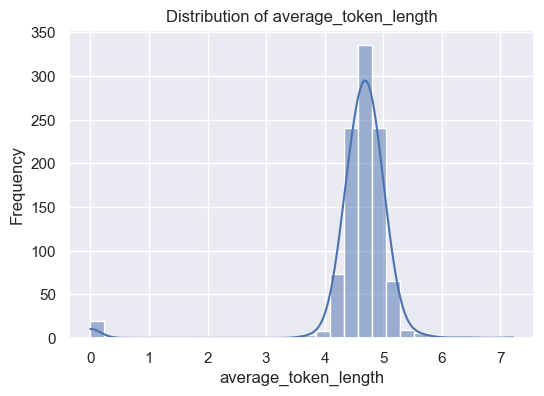

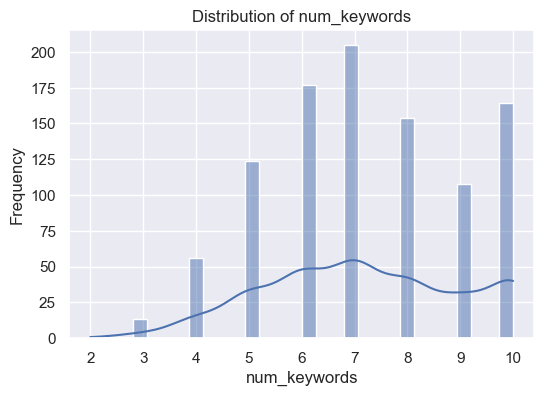

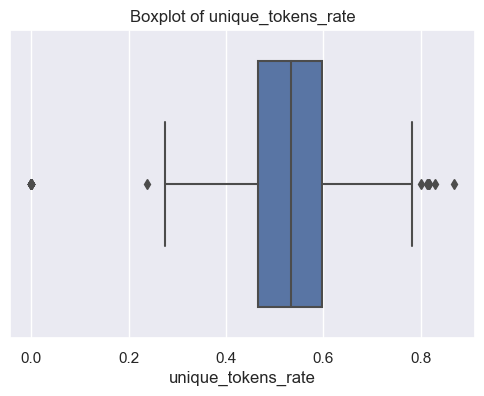

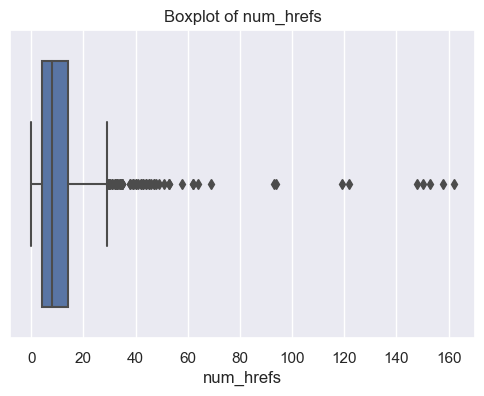

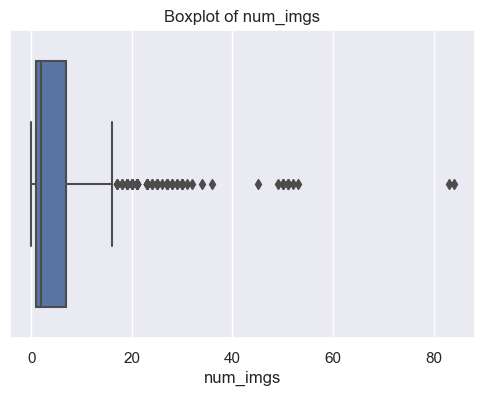

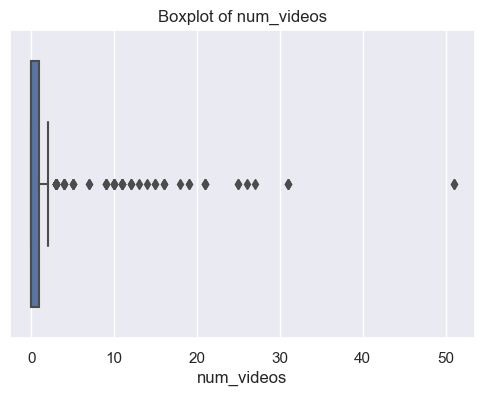

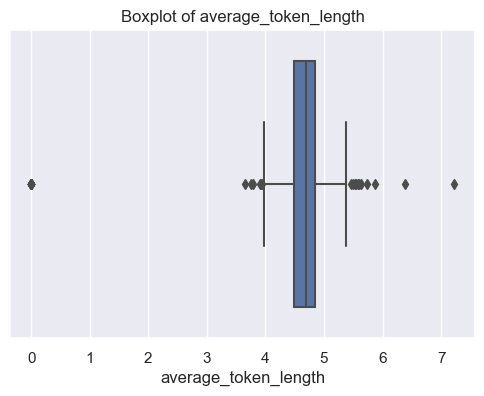

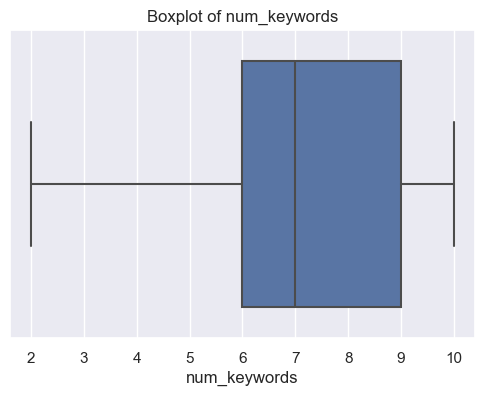

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric variables for univariate analysis
numeric_columns = ['unique_tokens_rate', 'num_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords']

# Histograms for numeric variables
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Boxplots for numeric variables
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

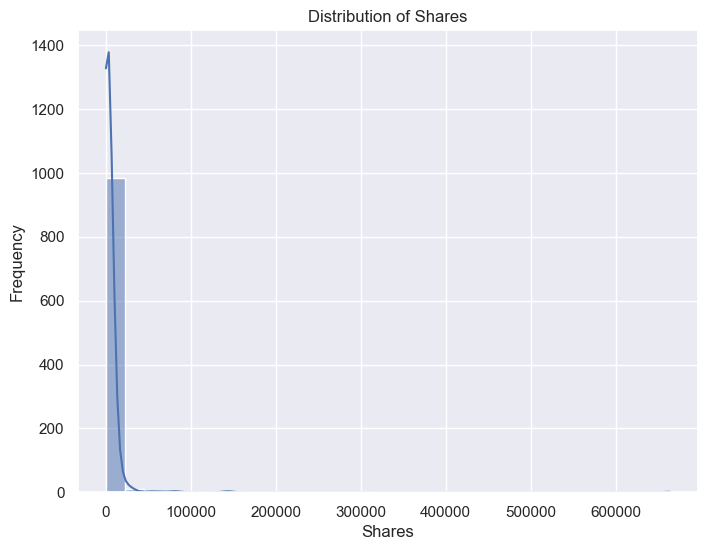

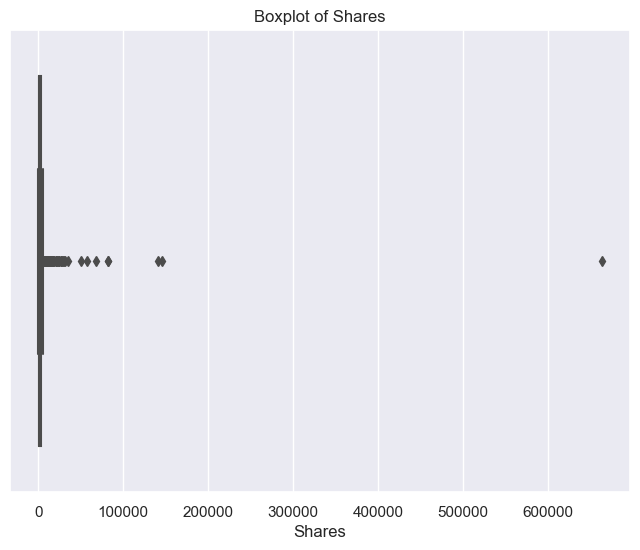

In [48]:
# Distribution of the target variable 'shares'
plt.figure(figsize=(8, 6))
sns.histplot(data['shares'], bins=30, kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

# Boxplot of the target variable 'shares'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['shares'])
plt.title('Boxplot of Shares')
plt.xlabel('Shares')
plt.show()

In [49]:
features = df.columns.tolist()[18:]
print("Total Number of Features: "+str(len(features)))

Total Number of Features: 14


In [50]:
df1 = df[features]
print(df1.shape)
df1.head(3)

(1003, 14)


global_rate_negative_words  title_subjectivity  title_sentiment_polarity  \
0                    0.024490                0.25                      0.25   
1                    0.003745                0.00                      0.00   
2                    0.019608                0.00                      0.00   

   shares  shares_2 shares_4  data_channel_encoded  num_tokens_title  \
0    1600         1   medium                     1                 6   
1    1500         1   medium                     5                10   
2    1400         0   medium                     5                14   

   num_tokens_content  links_to_words_ratio  images_to_words_ratio  \
0                 171              0.029240               0.017544   
1                  80              0.050000               0.012500   
2                 388              0.020619               0.002577   

   videos_to_words_ratio  weekday  is_weekend  
0               0.005848        0           0  
1               0.000000        1           0  
2               0.000000        1           0

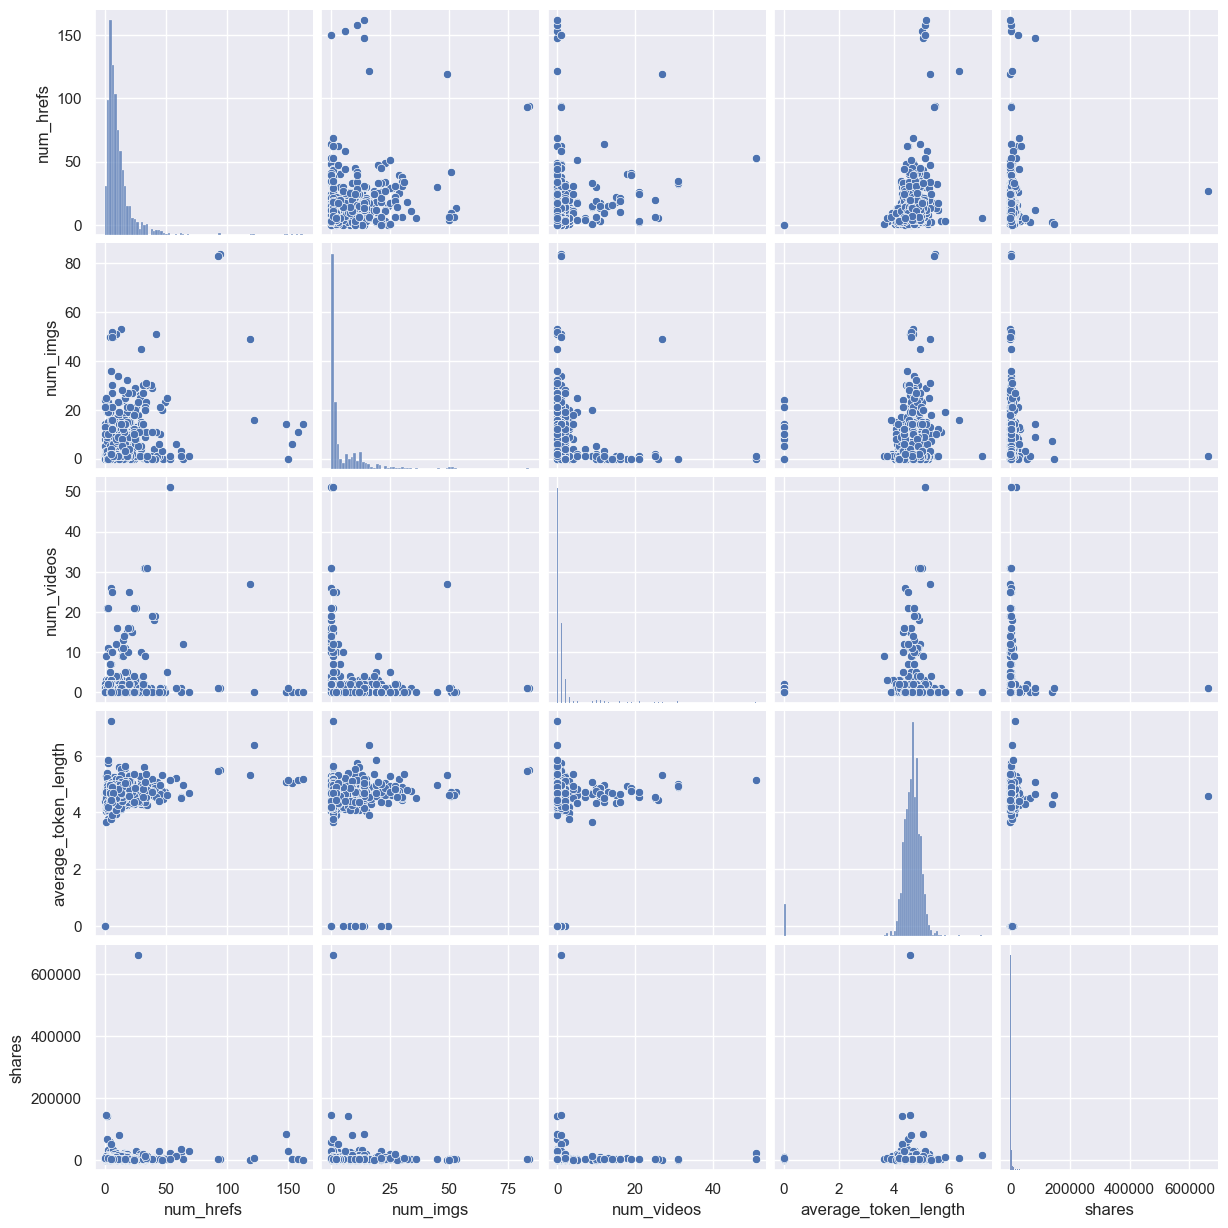

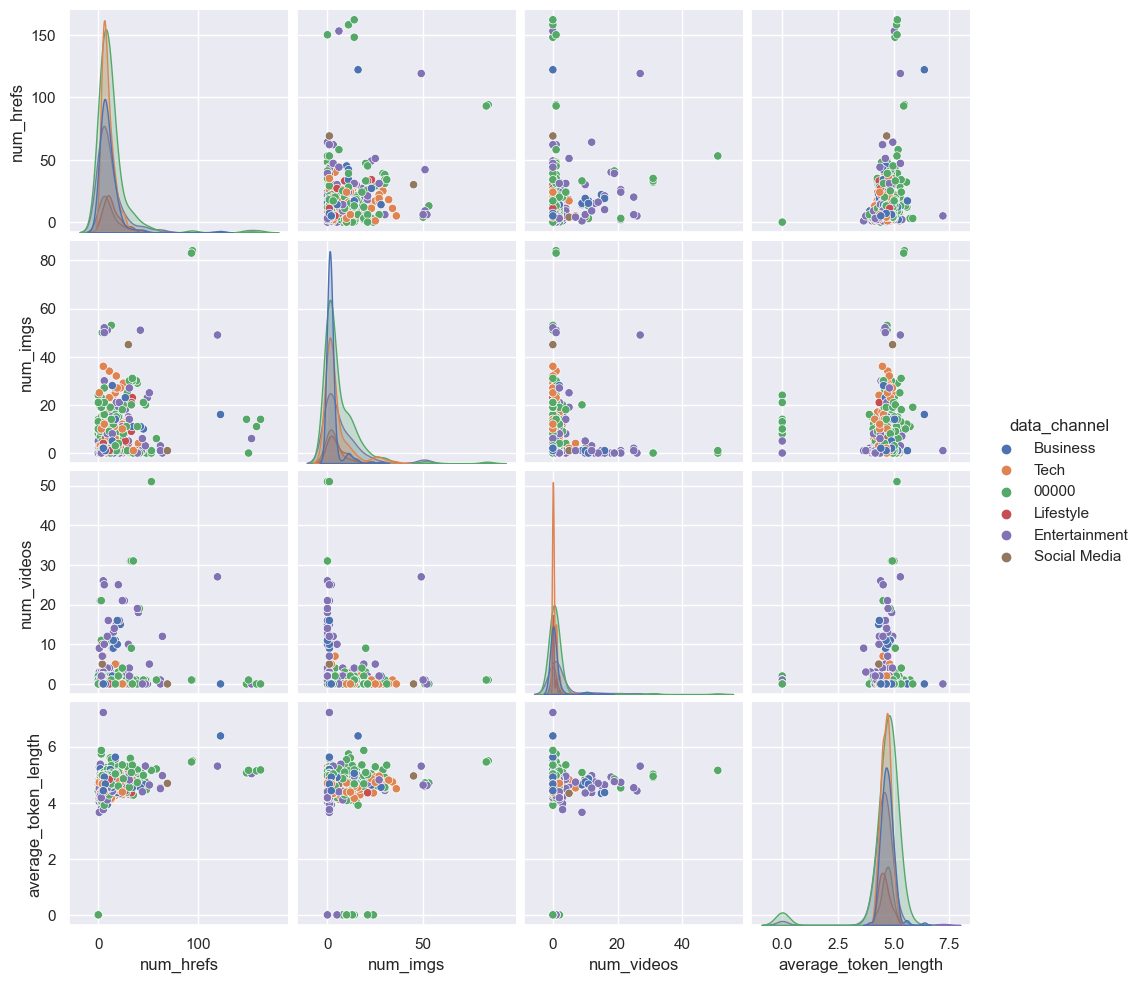

In [51]:
import seaborn as sns

# Pairwise scatter plots for selected numeric variables against the target variable 'shares'
sns.pairplot(data=data, vars=['num_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'shares'])
plt.show()

# Pairplot with hue based on categorical variable 'data_channel'
sns.pairplot(data=data, vars=['num_hrefs', 'num_imgs', 'num_videos', 'average_token_length'], hue='data_channel')
plt.show()

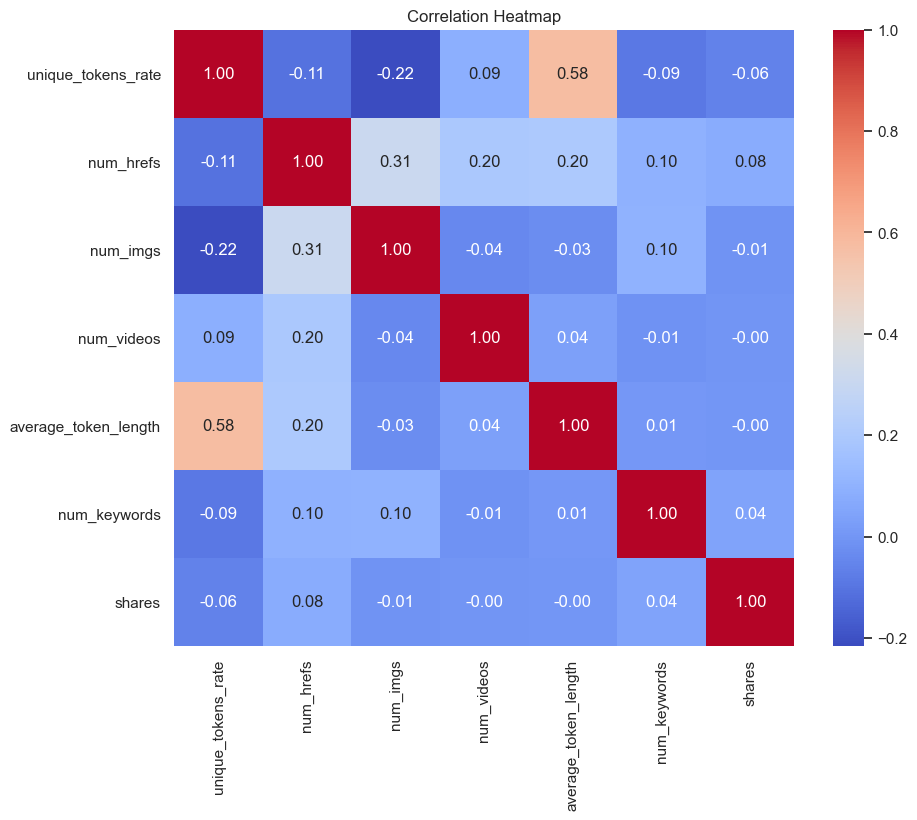

In [52]:
# Correlation heatmap for numeric variables including the target variable 'shares'
numeric_columns = ['unique_tokens_rate', 'num_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'shares']
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

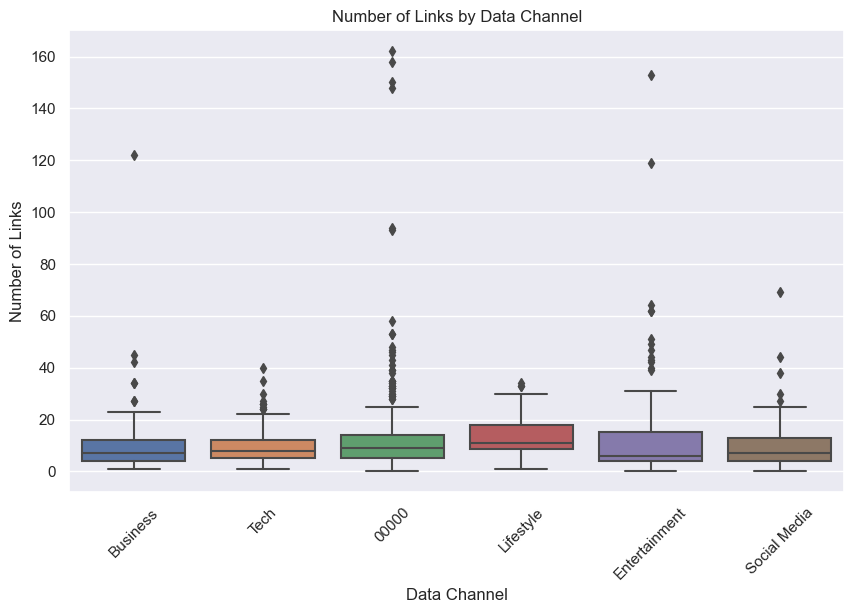

In [53]:
# Boxplots for numerical variables against a categorical variable (e.g., 'data_channel')
plt.figure(figsize=(10, 6))
sns.boxplot(x='data_channel', y='num_hrefs', data=data)
plt.title('Number of Links by Data Channel')
plt.xlabel('Data Channel')
plt.ylabel('Number of Links')
plt.xticks(rotation=45)
plt.show()

In [54]:
df1.head()

global_rate_negative_words  title_subjectivity  title_sentiment_polarity  \
0                    0.024490                0.25                      0.25   
1                    0.003745                0.00                      0.00   
2                    0.019608                0.00                      0.00   
3                    0.011952                0.00                      0.00   
4                    0.034946                0.00                      0.00   

   shares  shares_2 shares_4  data_channel_encoded  num_tokens_title  \
0    1600         1   medium                     1                 6   
1    1500         1   medium                     5                10   
2    1400         0   medium                     5                14   
3    1300         0   medium                     5                 6   
4    3000         1   medium                     0                 9   

   num_tokens_content  links_to_words_ratio  images_to_words_ratio  \
0                 171              0.029240               0.017544   
1                  80              0.050000               0.012500   
2                 388              0.020619               0.002577   
3                 235              0.017021               0.004255   
4                 243              0.024691               0.037037   

   videos_to_words_ratio  weekday  is_weekend  
0               0.005848        0           0  
1               0.000000        1           0  
2               0.000000        1           0  
3               0.000000        1           0  
4               0.000000        1           0

In [60]:
df2=df

In [61]:
df1.isna().sum()

global_rate_negative_words    0
title_subjectivity            0
title_sentiment_polarity      0
shares                        0
shares_2                      0
shares_4                      0
data_channel_encoded          0
num_tokens_title              0
num_tokens_content            0
links_to_words_ratio          0
images_to_words_ratio         0
videos_to_words_ratio         0
weekday                       0
is_weekend                    0
dtype: int64

In [62]:
df_final = df1.dropna()
df_final.isna().sum()

global_rate_negative_words    0
title_subjectivity            0
title_sentiment_polarity      0
shares                        0
shares_2                      0
shares_4                      0
data_channel_encoded          0
num_tokens_title              0
num_tokens_content            0
links_to_words_ratio          0
images_to_words_ratio         0
videos_to_words_ratio         0
weekday                       0
is_weekend                    0
dtype: int64

In [63]:
df_final.to_csv('selected.csv',index=False)

In [64]:
# Display data types of columns
print(df.dtypes)

article_id                             int64
title                                 object
text                                  object
published_date                datetime64[ns]
unique_tokens_rate                   float64
num_hrefs                              int64
num_imgs                               int64
num_videos                             int64
average_token_length                 float64
num_keywords                           int64
data_channel                          object
min_avg_key                          float64
max_avg_key                          float64
avg_avg_key                          float64
href_avg_shares                      float64
global_subjectivity                  float64
global_sentiment_polarity            float64
global_rate_positive_words           float64
global_rate_negative_words           float64
title_subjectivity                   float64
title_sentiment_polarity             float64
shares                                 int64
shares_2  

In [65]:
# Get numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Impute missing values in numerical columns using mean
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

In [66]:
df.to_csv('imputed_data.csv', index=False)

# FEATURE ENGINEERING

In [71]:
!pip install numpy==1.23.1
!pip install pandas==1.4.3
!pip install matplotlib==3.3.2
!pip install seaborn==0.11.0
!pip install joblib==1.1.0
!pip install nltk==3.7
!pip install wordcloud==1.8.2.2
!pip install scikit_learn==1.0.2

  Using cached matplotlib-3.3.2.tar.gz (37.9 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for matplotlib
Failed to build matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [573 lines of output]
  
  Edit setup.cfg to change the build options; suppress output with --quiet.
  
  BUILDING MATPLOTLIB
    matplotlib: yes [3.3.2]
        python: yes [3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit
                    (AMD64)]]
      platform: yes [win32]
   sample_data: yes [installing]
         tests: no  [skipping due to configuration]
        macosx: no  [Mac OS-X only]
  
  C:\Users\HP\anaconda3\lib\site-packages\setuptools\dist.py:286: SetuptoolsDeprecationWarning: The namespace_packages parameter is deprecated, consider using implicit namespaces instead (PEP 420).
    warnings.warn(msg, SetuptoolsDeprecationWarning)
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  copying lib\pylab.py -> build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\matp

     ---------------------------------------- 7.6/7.6 MB 1.2 MB/s eta 0:00:00
     -------------------------------------- 181.9/181.9 kB 1.4 MB/s eta 0:00:00


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\HP\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.



     ------------------------------------ 153.1/153.1 kB 763.8 kB/s eta 0:00:00
  Using cached matplotlib-3.8.2-cp39-cp39-win_amd64.whl (7.6 MB)


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\HP\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.



In [74]:
# One-hot encoding for categorical columns
data_encoded = pd.get_dummies(df, columns=['data_channel'])

# Label encoding (if necessary)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['data_channel_encoded'] = label_encoder.fit_transform(df['data_channel'])

In [75]:
df.head()

article_id                                              title  \
0     7014291                 It's Time for a YouTube Competitor   
1     7014327  The Ultimate Roundup of 2014's Biggest April F...   
2     7014304  A Selfie and One Garish Jacket: How the Red So...   
3     7031995    African Telecom Proposes More Diverse Emoticons   
4     6541359  Google to Launch Improved Android Camera App, ...   

                                                text published_date  \
0  It was reported last week that Yahoo is gettin...     2014-03-31   
1  April Fools' marks the day when pranking goes ...     2014-04-01   
2  The 2013 World Series champion Boston Red Sox ...     2014-04-01   
3  Less than a week after Apple pledged to make i...     2014-04-01   
4  Android users may soon see a series of new fea...     2014-04-01   

   unique_tokens_rate  num_hrefs  num_imgs  num_videos  average_token_length  \
0            0.640816          5         3           1              4.579592   
1            0.549618          4         1           0              4.636704   
2            0.577236          8         1           0              4.627451   
3            0.525896          4         1           0              5.083665   
4            0.588889          6         9           0              4.336022   

   num_keywords data_channel  min_avg_key  max_avg_key  avg_avg_key  \
0             5     Business     1459.500     4817.692     3370.415   
1             7         Tech        0.000     3581.094     2556.367   
2             7         Tech     2270.889     3852.800     3018.167   
3             9         Tech        0.000     3581.094     1871.403   
4             7        00000     3581.094     8453.451     5155.323   

   href_avg_shares  global_subjectivity  global_sentiment_polarity  \
0         1833.333             0.403762                   0.038762   
1         8500.000             0.410707                   0.180934   
2         2076.333             0.397545                   0.044864   
3         2200.000             0.491578                   0.157620   
4          805.000             0.628535                   0.078497   

   global_rate_positive_words  global_rate_negative_words  title_subjectivity  \
0                    0.036735                    0.024490                0.25   
1                    0.044944                    0.003745                0.00   
2                    0.035294                    0.019608                0.00   
3                    0.047809                    0.011952                0.00   
4                    0.053763                    0.034946                0.00   

   title_sentiment_polarity  shares  shares_2 shares_4  data_channel_encoded  \
0                      0.25    1600         1   medium                     1   
1                      0.00    1500         1   medium                     5   
2                      0.00    1400         0   medium                     5   
3                      0.00    1300         0   medium                     5   
4                      0.00    3000         1   medium                     0   

   num_tokens_title  num_tokens_content  links_to_words_ratio  \
0                 6                 171              0.029240   
1                10                  80              0.050000   
2                14                 388              0.020619   
3                 6                 235              0.017021   
4                 9                 243              0.024691   

   images_to_words_ratio  videos_to_words_ratio  weekday  is_weekend  
0               0.017544               0.005848        0           0  
1               0.012500               0.000000        1           0  
2               0.002577               0.000000        1           0  
3               0.004255               0.000000        1           0  
4               0.037037               0.000000        1           0

In [76]:
df['num_tokens_title'] = df['title'].apply(lambda x: len(str(x).split()))
df['num_tokens_content'] = df['text'].apply(lambda x: len(str(x).split()))

In [77]:
df.head()

article_id                                              title  \
0     7014291                 It's Time for a YouTube Competitor   
1     7014327  The Ultimate Roundup of 2014's Biggest April F...   
2     7014304  A Selfie and One Garish Jacket: How the Red So...   
3     7031995    African Telecom Proposes More Diverse Emoticons   
4     6541359  Google to Launch Improved Android Camera App, ...   

                                                text published_date  \
0  It was reported last week that Yahoo is gettin...     2014-03-31   
1  April Fools' marks the day when pranking goes ...     2014-04-01   
2  The 2013 World Series champion Boston Red Sox ...     2014-04-01   
3  Less than a week after Apple pledged to make i...     2014-04-01   
4  Android users may soon see a series of new fea...     2014-04-01   

   unique_tokens_rate  num_hrefs  num_imgs  num_videos  average_token_length  \
0            0.640816          5         3           1              4.579592   
1            0.549618          4         1           0              4.636704   
2            0.577236          8         1           0              4.627451   
3            0.525896          4         1           0              5.083665   
4            0.588889          6         9           0              4.336022   

   num_keywords data_channel  min_avg_key  max_avg_key  avg_avg_key  \
0             5     Business     1459.500     4817.692     3370.415   
1             7         Tech        0.000     3581.094     2556.367   
2             7         Tech     2270.889     3852.800     3018.167   
3             9         Tech        0.000     3581.094     1871.403   
4             7        00000     3581.094     8453.451     5155.323   

   href_avg_shares  global_subjectivity  global_sentiment_polarity  \
0         1833.333             0.403762                   0.038762   
1         8500.000             0.410707                   0.180934   
2         2076.333             0.397545                   0.044864   
3         2200.000             0.491578                   0.157620   
4          805.000             0.628535                   0.078497   

   global_rate_positive_words  global_rate_negative_words  title_subjectivity  \
0                    0.036735                    0.024490                0.25   
1                    0.044944                    0.003745                0.00   
2                    0.035294                    0.019608                0.00   
3                    0.047809                    0.011952                0.00   
4                    0.053763                    0.034946                0.00   

   title_sentiment_polarity  shares  shares_2 shares_4  data_channel_encoded  \
0                      0.25    1600         1   medium                     1   
1                      0.00    1500         1   medium                     5   
2                      0.00    1400         0   medium                     5   
3                      0.00    1300         0   medium                     5   
4                      0.00    3000         1   medium                     0   

   num_tokens_title  num_tokens_content  links_to_words_ratio  \
0                 6                 171              0.029240   
1                10                  80              0.050000   
2                14                 388              0.020619   
3                 6                 235              0.017021   
4                 9                 243              0.024691   

   images_to_words_ratio  videos_to_words_ratio  weekday  is_weekend  
0               0.017544               0.005848        0           0  
1               0.012500               0.000000        1           0  
2               0.002577               0.000000        1           0  
3               0.004255               0.000000        1           0  
4               0.037037               0.000000        1           0

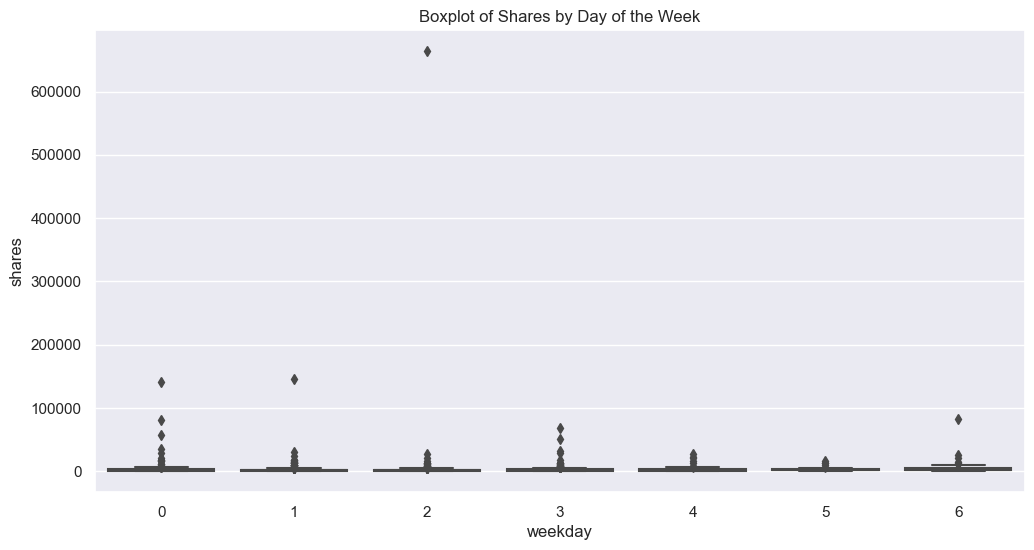

In [78]:
# Box plot for shares by day of the week (assuming 'published_date' is a datetime column)
df['published_date'] = pd.to_datetime(df['published_date'])
df['weekday'] = df['published_date'].dt.weekday

plt.figure(figsize=(12, 6))
sns.boxplot(x='weekday', y='shares', data=df)
plt.title('Boxplot of Shares by Day of the Week')
plt.show()

In [79]:
#Date Features
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)


In [80]:
# Other Features
df['links_to_words_ratio'] = df['num_hrefs'] / df['num_tokens_content']
df['images_to_words_ratio'] = df['num_imgs'] / df['num_tokens_content']
df['videos_to_words_ratio'] = df['num_videos'] / df['num_tokens_content']


In [81]:
df.head()

article_id                                              title  \
0     7014291                 It's Time for a YouTube Competitor   
1     7014327  The Ultimate Roundup of 2014's Biggest April F...   
2     7014304  A Selfie and One Garish Jacket: How the Red So...   
3     7031995    African Telecom Proposes More Diverse Emoticons   
4     6541359  Google to Launch Improved Android Camera App, ...   

                                                text published_date  \
0  It was reported last week that Yahoo is gettin...     2014-03-31   
1  April Fools' marks the day when pranking goes ...     2014-04-01   
2  The 2013 World Series champion Boston Red Sox ...     2014-04-01   
3  Less than a week after Apple pledged to make i...     2014-04-01   
4  Android users may soon see a series of new fea...     2014-04-01   

   unique_tokens_rate  num_hrefs  num_imgs  num_videos  average_token_length  \
0            0.640816          5         3           1              4.579592   
1            0.549618          4         1           0              4.636704   
2            0.577236          8         1           0              4.627451   
3            0.525896          4         1           0              5.083665   
4            0.588889          6         9           0              4.336022   

   num_keywords data_channel  min_avg_key  max_avg_key  avg_avg_key  \
0             5     Business     1459.500     4817.692     3370.415   
1             7         Tech        0.000     3581.094     2556.367   
2             7         Tech     2270.889     3852.800     3018.167   
3             9         Tech        0.000     3581.094     1871.403   
4             7        00000     3581.094     8453.451     5155.323   

   href_avg_shares  global_subjectivity  global_sentiment_polarity  \
0         1833.333             0.403762                   0.038762   
1         8500.000             0.410707                   0.180934   
2         2076.333             0.397545                   0.044864   
3         2200.000             0.491578                   0.157620   
4          805.000             0.628535                   0.078497   

   global_rate_positive_words  global_rate_negative_words  title_subjectivity  \
0                    0.036735                    0.024490                0.25   
1                    0.044944                    0.003745                0.00   
2                    0.035294                    0.019608                0.00   
3                    0.047809                    0.011952                0.00   
4                    0.053763                    0.034946                0.00   

   title_sentiment_polarity  shares  shares_2 shares_4  data_channel_encoded  \
0                      0.25    1600         1   medium                     1   
1                      0.00    1500         1   medium                     5   
2                      0.00    1400         0   medium                     5   
3                      0.00    1300         0   medium                     5   
4                      0.00    3000         1   medium                     0   

   num_tokens_title  num_tokens_content  links_to_words_ratio  \
0                 6                 171              0.029240   
1                10                  80              0.050000   
2                14                 388              0.020619   
3                 6                 235              0.017021   
4                 9                 243              0.024691   

   images_to_words_ratio  videos_to_words_ratio  weekday  is_weekend  
0               0.017544               0.005848        0           0  
1               0.012500               0.000000        1           0  
2               0.002577               0.000000        1           0  
3               0.004255               0.000000        1           0  
4               0.037037               0.000000        1           0

In [45]:
# Removing dump articles - Articles with no words 
# find number of rows that contain 0 for n_tokens_content
num_of_nowords=df[df['num_tokens_content']==0].index
print('number of news items with no words',num_of_nowords.size)

number of news items with no words 0


In [82]:
# Number of words in content vs Number of shares

plt.figure(figsize=(10,3))
ax = sns.scatterplot(y='shares', x='num_tokens_content', data=df)

In [92]:
df.shape

(1003, 32)

In [96]:
a,b = df['shares'].mean(),df['shares'].median()
print(f'Mean article shares = {a}')
print(f'Median article share = {b}')

# Days of the week 
WeekDay = df.columns.values[30:32]
WeekDay

Mean article shares = 4247.304087736789
Median article share = 1600.0


array(['weekday', 'is_weekend'], dtype=object)

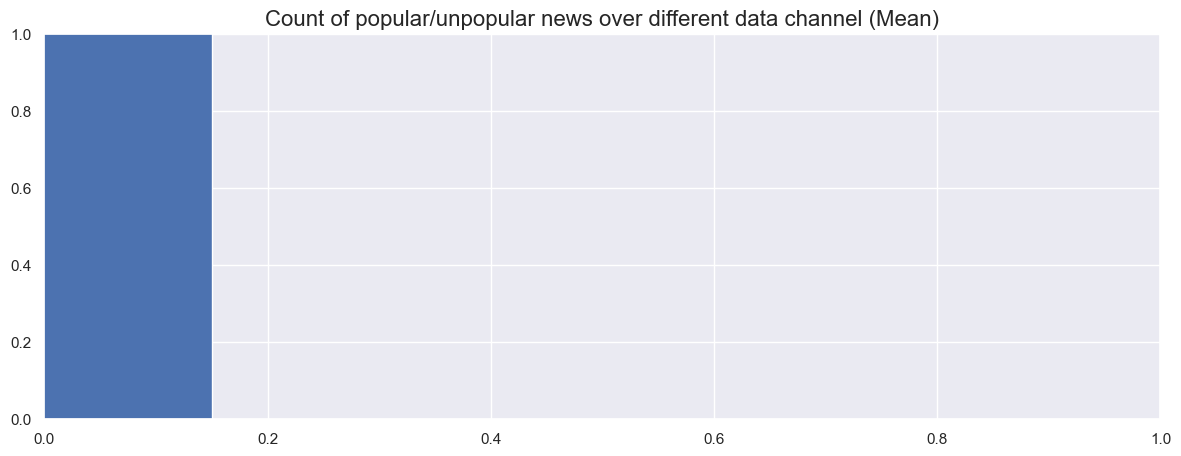

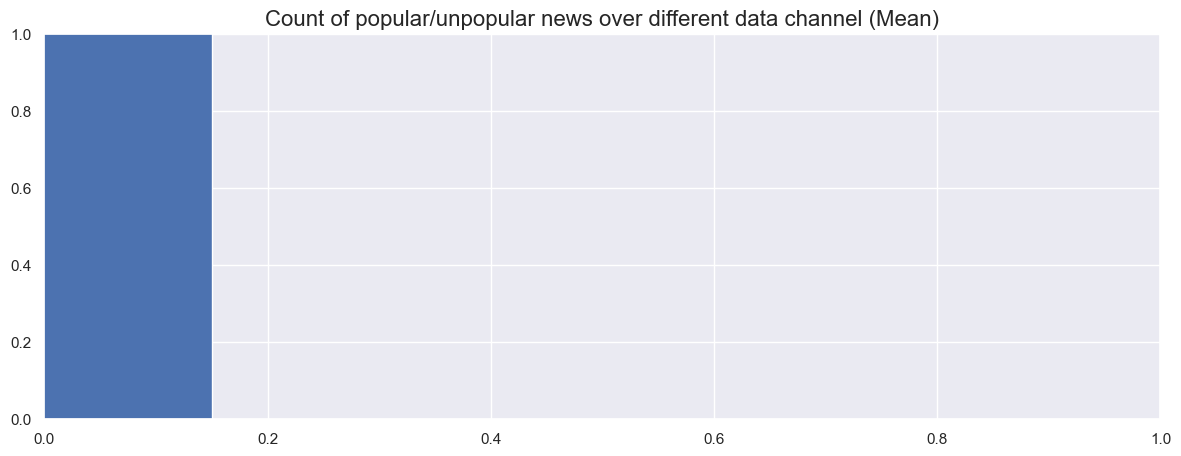

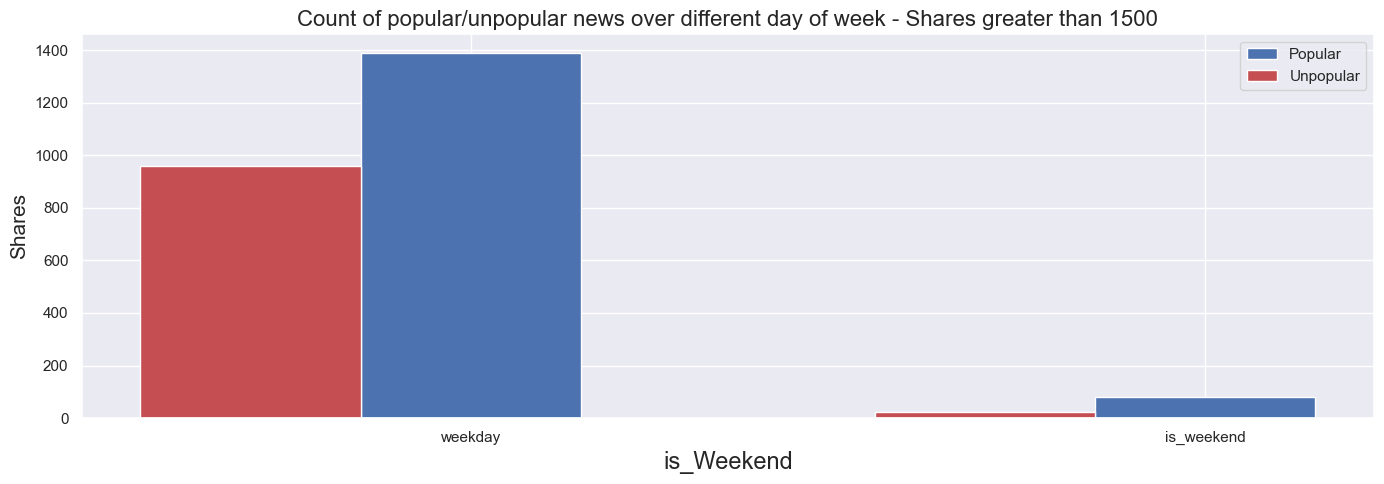

In [97]:
a=1500
Unpopular=df[df['shares']<a]
Popular=df[df['shares']>=a]
Unpopular_day = Unpopular[WeekDay].sum().values
Popular_day = Popular[WeekDay].sum().values

fig = plt.figure(figsize = (14,5))
plt.title("Count of popular/unpopular news over different day of week - Shares greater than 1500", fontsize = 16)

plt.bar(np.arange(len(WeekDay)),Popular_day,width=0.3,align='center',color='b',label='Popular')
plt.bar(np.arange(len(WeekDay))-0.3,Unpopular_day,width=0.3,align='center',color='r',label='Unpopular')

plt.xticks(np.arange(len(WeekDay)),WeekDay)
plt.ylabel('Shares',fontsize=15)
plt.xlabel('is_Weekend',fontsize=17)
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [101]:
channels=df.columns[24:32]
channels


Index(['data_channel_encoded', 'num_tokens_title', 'num_tokens_content',
       'links_to_words_ratio', 'images_to_words_ratio',
       'videos_to_words_ratio', 'weekday', 'is_weekend'],
      dtype='object')

In [86]:
df1 = df[features]
print(df1.shape)
df1.head(3)

(1003, 14)


global_rate_negative_words  title_subjectivity  title_sentiment_polarity  \
0                    0.024490                0.25                      0.25   
1                    0.003745                0.00                      0.00   
2                    0.019608                0.00                      0.00   

   shares  shares_2 shares_4  data_channel_encoded  num_tokens_title  \
0    1600         1   medium                     1                 6   
1    1500         1   medium                     5                10   
2    1400         0   medium                     5                14   

   num_tokens_content  links_to_words_ratio  images_to_words_ratio  \
0                 171              0.029240               0.017544   
1                  80              0.050000               0.012500   
2                 388              0.020619               0.002577   

   videos_to_words_ratio  weekday  is_weekend  
0               0.005848        0           0  
1               0.000000        1           0  
2               0.000000        1           0

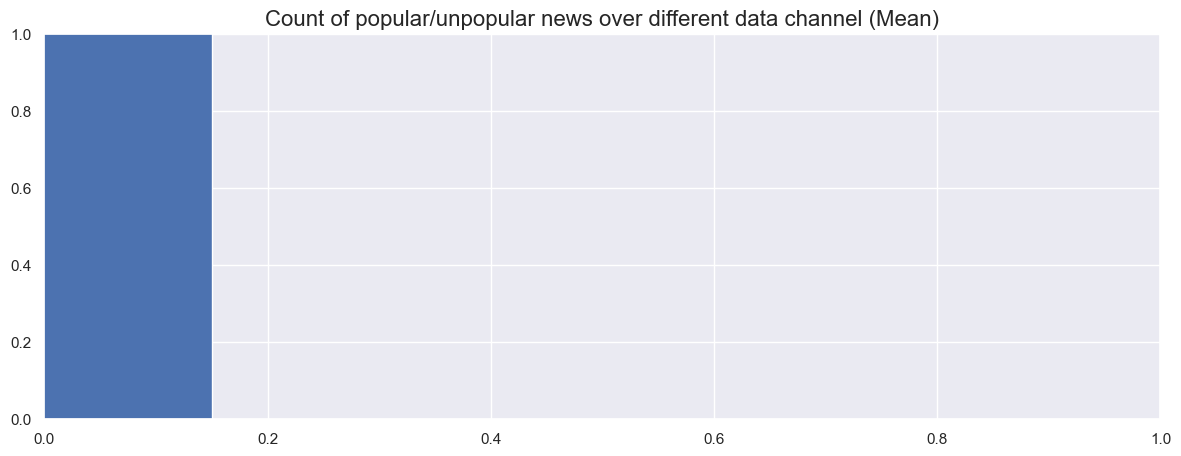

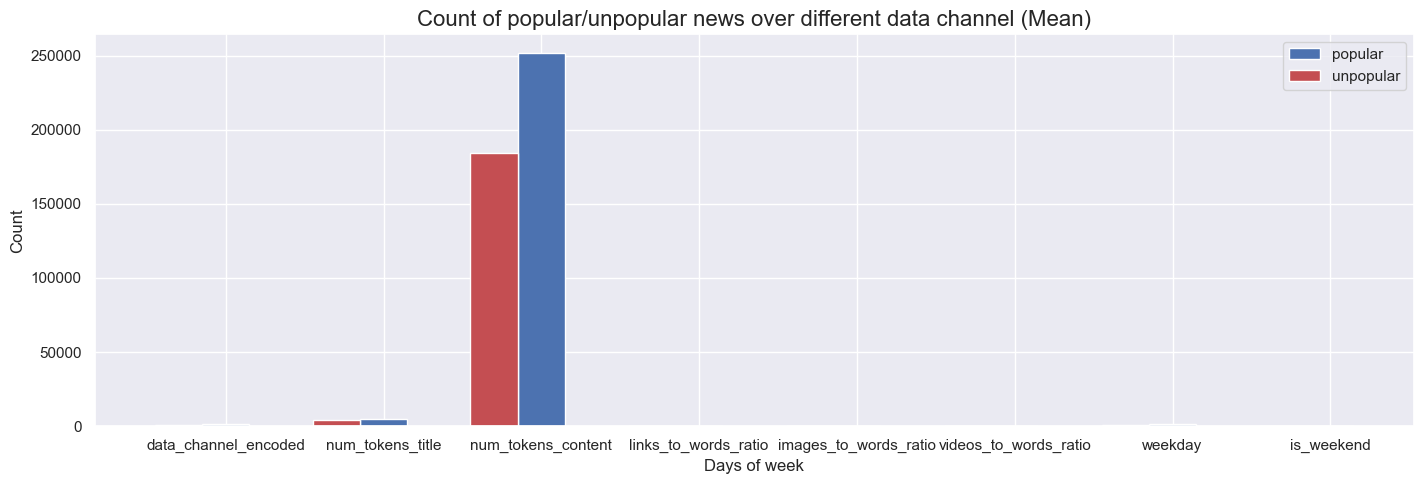

In [102]:
Unpopular_chan=df[df['shares']<a]
Popular_chan=df[df['shares']>=a]
Unpopular_channel = Unpopular_chan[channels].sum().values
Popular_channel = Popular_chan[channels].sum().values
fig = plt.figure(figsize = (14.4,5))
plt.title("Count of popular/unpopular news over different data channel (Mean)", fontsize = 16)
plt.bar(np.arange(len(channels)), Popular_channel, width = 0.3, align="center", color = 'b', \
          label = "popular")
plt.bar(np.arange(len(channels)) - 0.3, Unpopular_channel, width = 0.3, align = "center", color = 'r', \
          label = "unpopular")
plt.xticks(np.arange(len(channels)), channels)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [103]:
df = pd.read_csv('imputed_data.csv')
print(df.shape)
df.head()

(1003, 32)


article_id                                              title  \
0     7014291                 It's Time for a YouTube Competitor   
1     7014327  The Ultimate Roundup of 2014's Biggest April F...   
2     7014304  A Selfie and One Garish Jacket: How the Red So...   
3     7031995    African Telecom Proposes More Diverse Emoticons   
4     6541359  Google to Launch Improved Android Camera App, ...   

                                                text published_date  \
0  It was reported last week that Yahoo is gettin...     2014-03-31   
1  April Fools' marks the day when pranking goes ...     2014-04-01   
2  The 2013 World Series champion Boston Red Sox ...     2014-04-01   
3  Less than a week after Apple pledged to make i...     2014-04-01   
4  Android users may soon see a series of new fea...     2014-04-01   

   unique_tokens_rate  num_hrefs  num_imgs  num_videos  average_token_length  \
0            0.640816          5         3           1              4.579592   
1            0.549618          4         1           0              4.636704   
2            0.577236          8         1           0              4.627451   
3            0.525896          4         1           0              5.083665   
4            0.588889          6         9           0              4.336022   

   num_keywords data_channel  min_avg_key  max_avg_key  avg_avg_key  \
0             5     Business     1459.500     4817.692     3370.415   
1             7         Tech        0.000     3581.094     2556.367   
2             7         Tech     2270.889     3852.800     3018.167   
3             9         Tech        0.000     3581.094     1871.403   
4             7        00000     3581.094     8453.451     5155.323   

   href_avg_shares  global_subjectivity  global_sentiment_polarity  \
0         1833.333             0.403762                   0.038762   
1         8500.000             0.410707                   0.180934   
2         2076.333             0.397545                   0.044864   
3         2200.000             0.491578                   0.157620   
4          805.000             0.628535                   0.078497   

   global_rate_positive_words  global_rate_negative_words  title_subjectivity  \
0                    0.036735                    0.024490                0.25   
1                    0.044944                    0.003745                0.00   
2                    0.035294                    0.019608                0.00   
3                    0.047809                    0.011952                0.00   
4                    0.053763                    0.034946                0.00   

   title_sentiment_polarity  shares  shares_2 shares_4  data_channel_encoded  \
0                      0.25    1600         1   medium                     1   
1                      0.00    1500         1   medium                     5   
2                      0.00    1400         0   medium                     5   
3                      0.00    1300         0   medium                     5   
4                      0.00    3000         1   medium                     0   

   num_tokens_title  num_tokens_content  links_to_words_ratio  \
0                 6                 171              0.029240   
1                10                  80              0.050000   
2                14                 388              0.020619   
3                 6                 235              0.017021   
4                 9                 243              0.024691   

   images_to_words_ratio  videos_to_words_ratio  weekday  is_weekend  
0               0.017544               0.005848        0           0  
1               0.012500               0.000000        1           0  
2               0.002577               0.000000        1           0  
3               0.004255               0.000000        1           0  
4               0.037037               0.000000        1           0

In [104]:
# Outlier Treatment using IQR method for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [105]:
# Display the first few rows of the dataset
print(df.head())

   article_id                                              title  \
0     7014291                 It's Time for a YouTube Competitor   
1     7014327  The Ultimate Roundup of 2014's Biggest April F...   
2     7014304  A Selfie and One Garish Jacket: How the Red So...   
3     7031995    African Telecom Proposes More Diverse Emoticons   
4     6541359  Google to Launch Improved Android Camera App, ...   

                                                text published_date  \
0  It was reported last week that Yahoo is gettin...     2014-03-31   
1  April Fools' marks the day when pranking goes ...     2014-04-01   
2  The 2013 World Series champion Boston Red Sox ...     2014-04-01   
3  Less than a week after Apple pledged to make i...     2014-04-01   
4  Android users may soon see a series of new fea...     2014-04-01   

   unique_tokens_rate  num_hrefs  num_imgs  num_videos  average_token_length  \
0            0.640816          5         3           1              4.579592   
1   

In [106]:
# Check column names in your dataset
print(df.columns)

Index(['article_id', 'title', 'text', 'published_date', 'unique_tokens_rate',
       'num_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel', 'min_avg_key', 'max_avg_key',
       'avg_avg_key', 'href_avg_shares', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'title_subjectivity',
       'title_sentiment_polarity', 'shares', 'shares_2', 'shares_4',
       'data_channel_encoded', 'num_tokens_title', 'num_tokens_content',
       'links_to_words_ratio', 'images_to_words_ratio',
       'videos_to_words_ratio', 'weekday', 'is_weekend'],
      dtype='object')


In [107]:
# Example: Creating a new feature by combining existing features
df['total_links'] = df['num_hrefs'] + df['num_imgs'] + df['num_videos']

In [108]:
from sklearn.feature_extraction.text import CountVectorizer

In [109]:
cv = CountVectorizer(ngram_range=(2,2),max_features=10)
# cv = CountVectorizer()
cv_object = cv.fit(df['title'])

In [110]:
import pickle
fileName = 'count_vectorizer.pkl'
with open(fileName,'wb') as f:
    pickle.dump(cv_object,f)

In [111]:
X = cv_object.transform(df['title'])
print(X.shape)
X.toarray()

(1003, 10)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [112]:
df.to_csv('model_ready.csv',index=False)

In [113]:
df = pd.read_csv('model_ready.csv')
print(df.shape)
df.head()

(1003, 33)


article_id                                              title  \
0     7014291                 It's Time for a YouTube Competitor   
1     7014327  The Ultimate Roundup of 2014's Biggest April F...   
2     7014304  A Selfie and One Garish Jacket: How the Red So...   
3     7031995    African Telecom Proposes More Diverse Emoticons   
4     6541359  Google to Launch Improved Android Camera App, ...   

                                                text published_date  \
0  It was reported last week that Yahoo is gettin...     2014-03-31   
1  April Fools' marks the day when pranking goes ...     2014-04-01   
2  The 2013 World Series champion Boston Red Sox ...     2014-04-01   
3  Less than a week after Apple pledged to make i...     2014-04-01   
4  Android users may soon see a series of new fea...     2014-04-01   

   unique_tokens_rate  num_hrefs  num_imgs  num_videos  average_token_length  \
0            0.640816          5         3           1              4.579592   
1            0.549618          4         1           0              4.636704   
2            0.577236          8         1           0              4.627451   
3            0.525896          4         1           0              5.083665   
4            0.588889          6         9           0              4.336022   

   num_keywords data_channel  min_avg_key  max_avg_key  avg_avg_key  \
0             5     Business     1459.500     4817.692     3370.415   
1             7         Tech        0.000     3581.094     2556.367   
2             7         Tech     2270.889     3852.800     3018.167   
3             9         Tech        0.000     3581.094     1871.403   
4             7        00000     3581.094     8453.451     5155.323   

   href_avg_shares  global_subjectivity  global_sentiment_polarity  \
0         1833.333             0.403762                   0.038762   
1         8500.000             0.410707                   0.180934   
2         2076.333             0.397545                   0.044864   
3         2200.000             0.491578                   0.157620   
4          805.000             0.628535                   0.078497   

   global_rate_positive_words  global_rate_negative_words  title_subjectivity  \
0                    0.036735                    0.024490                0.25   
1                    0.044944                    0.003745                0.00   
2                    0.035294                    0.019608                0.00   
3                    0.047809                    0.011952                0.00   
4                    0.053763                    0.034946                0.00   

   title_sentiment_polarity  shares  shares_2 shares_4  data_channel_encoded  \
0                      0.25    1600         1   medium                     1   
1                      0.00    1500         1   medium                     5   
2                      0.00    1400         0   medium                     5   
3                      0.00    1300         0   medium                     5   
4                      0.00    3000         1   medium                     0   

   num_tokens_title  num_tokens_content  links_to_words_ratio  \
0                 6                 171              0.029240   
1                10                  80              0.050000   
2                14                 388              0.020619   
3                 6                 235              0.017021   
4                 9                 243              0.024691   

   images_to_words_ratio  videos_to_words_ratio  weekday  is_weekend  \
0               0.017544               0.005848        0           0   
1               0.012500               0.000000        1           0   
2               0.002577               0.000000        1           0   
3               0.004255               0.000000        1           0   
4               0.037037               0.000000        1           0   

   total_links  
0            9  
1           

# MODEL IMPLEMENTATION

In [120]:
df3=df2
df4=df

In [121]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time 
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import metrics

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [122]:
df = pd.read_csv('model_ready.csv')
print(df.shape)
df.head()

(1003, 33)


article_id                                              title  \
0     7014291                 It's Time for a YouTube Competitor   
1     7014327  The Ultimate Roundup of 2014's Biggest April F...   
2     7014304  A Selfie and One Garish Jacket: How the Red So...   
3     7031995    African Telecom Proposes More Diverse Emoticons   
4     6541359  Google to Launch Improved Android Camera App, ...   

                                                text published_date  \
0  It was reported last week that Yahoo is gettin...     2014-03-31   
1  April Fools' marks the day when pranking goes ...     2014-04-01   
2  The 2013 World Series champion Boston Red Sox ...     2014-04-01   
3  Less than a week after Apple pledged to make i...     2014-04-01   
4  Android users may soon see a series of new fea...     2014-04-01   

   unique_tokens_rate  num_hrefs  num_imgs  num_videos  average_token_length  \
0            0.640816          5         3           1              4.579592   
1            0.549618          4         1           0              4.636704   
2            0.577236          8         1           0              4.627451   
3            0.525896          4         1           0              5.083665   
4            0.588889          6         9           0              4.336022   

   num_keywords data_channel  min_avg_key  max_avg_key  avg_avg_key  \
0             5     Business     1459.500     4817.692     3370.415   
1             7         Tech        0.000     3581.094     2556.367   
2             7         Tech     2270.889     3852.800     3018.167   
3             9         Tech        0.000     3581.094     1871.403   
4             7        00000     3581.094     8453.451     5155.323   

   href_avg_shares  global_subjectivity  global_sentiment_polarity  \
0         1833.333             0.403762                   0.038762   
1         8500.000             0.410707                   0.180934   
2         2076.333             0.397545                   0.044864   
3         2200.000             0.491578                   0.157620   
4          805.000             0.628535                   0.078497   

   global_rate_positive_words  global_rate_negative_words  title_subjectivity  \
0                    0.036735                    0.024490                0.25   
1                    0.044944                    0.003745                0.00   
2                    0.035294                    0.019608                0.00   
3                    0.047809                    0.011952                0.00   
4                    0.053763                    0.034946                0.00   

   title_sentiment_polarity  shares  shares_2 shares_4  data_channel_encoded  \
0                      0.25    1600         1   medium                     1   
1                      0.00    1500         1   medium                     5   
2                      0.00    1400         0   medium                     5   
3                      0.00    1300         0   medium                     5   
4                      0.00    3000         1   medium                     0   

   num_tokens_title  num_tokens_content  links_to_words_ratio  \
0                 6                 171              0.029240   
1                10                  80              0.050000   
2                14                 388              0.020619   
3                 6                 235              0.017021   
4                 9                 243              0.024691   

   images_to_words_ratio  videos_to_words_ratio  weekday  is_weekend  \
0               0.017544               0.005848        0           0   
1               0.012500               0.000000        1           0   
2               0.002577               0.000000        1           0   
3               0.004255               0.000000        1           0   
4               0.037037               0.000000        1           0   

   total_links  
0            9  
1           

In [123]:
import pandas as pd

# Assuming 'published_date' is the column containing date strings like '2014-03-31'
# Convert 'published_date' column to datetime format
df['published_date'] = pd.to_datetime(df['published_date'])

# Extract year, month, and day into separate columns
df['year'] = df['published_date'].dt.year
df['month'] = df['published_date'].dt.month
df['day'] = df['published_date'].dt.day

# Display the updated DataFrame
print(df.head())

   article_id                                              title  \
0     7014291                 It's Time for a YouTube Competitor   
1     7014327  The Ultimate Roundup of 2014's Biggest April F...   
2     7014304  A Selfie and One Garish Jacket: How the Red So...   
3     7031995    African Telecom Proposes More Diverse Emoticons   
4     6541359  Google to Launch Improved Android Camera App, ...   

                                                text published_date  \
0  It was reported last week that Yahoo is gettin...     2014-03-31   
1  April Fools' marks the day when pranking goes ...     2014-04-01   
2  The 2013 World Series champion Boston Red Sox ...     2014-04-01   
3  Less than a week after Apple pledged to make i...     2014-04-01   
4  Android users may soon see a series of new fea...     2014-04-01   

   unique_tokens_rate  num_hrefs  num_imgs  num_videos  average_token_length  \
0            0.640816          5         3           1              4.579592   
1   

In [124]:
# Check column names in your dataset
print(df.columns)

Index(['article_id', 'title', 'text', 'published_date', 'unique_tokens_rate',
       'num_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel', 'min_avg_key', 'max_avg_key',
       'avg_avg_key', 'href_avg_shares', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'title_subjectivity',
       'title_sentiment_polarity', 'shares', 'shares_2', 'shares_4',
       'data_channel_encoded', 'num_tokens_title', 'num_tokens_content',
       'links_to_words_ratio', 'images_to_words_ratio',
       'videos_to_words_ratio', 'weekday', 'is_weekend', 'total_links', 'year',
       'month', 'day'],
      dtype='object')


In [125]:
# Selecting only numerical features
cols_to_drop = ['title','text','data_channel','published_date']

features = df.drop(cols_to_drop,axis=1).columns.tolist()
print("Final number of features: "+str(len(features)))

Final number of features: 32


In [137]:
features

['article_id',
 'unique_tokens_rate',
 'num_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'min_avg_key',
 'max_avg_key',
 'avg_avg_key',
 'href_avg_shares',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'title_subjectivity',
 'title_sentiment_polarity',
 'shares',
 'shares_2',
 'shares_4',
 'data_channel_encoded',
 'num_tokens_title',
 'num_tokens_content',
 'links_to_words_ratio',
 'images_to_words_ratio',
 'videos_to_words_ratio',
 'weekday',
 'is_weekend',
 'total_links',
 'year',
 'month',
 'day']

In [138]:
featuresMod = ['article_id',
 'unique_tokens_rate',
 'num_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'min_avg_key',
 'max_avg_key',
 'avg_avg_key',
 'href_avg_shares',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'title_subjectivity',
 'title_sentiment_polarity',
 'shares',
 'shares_2',
 'shares_4',
 'data_channel_encoded',
 'num_tokens_title',
 'num_tokens_content',
 'links_to_words_ratio',
 'images_to_words_ratio',
 'videos_to_words_ratio',
 'weekday',
 'is_weekend',
 'total_links',
 'year',
 'month',
 'day']
 
print(len(featuresMod))

32


In [139]:
dict(zip(features,featuresMod))

{'article_id': 'article_id',
 'unique_tokens_rate': 'unique_tokens_rate',
 'num_hrefs': 'num_hrefs',
 'num_imgs': 'num_imgs',
 'num_videos': 'num_videos',
 'average_token_length': 'average_token_length',
 'num_keywords': 'num_keywords',
 'min_avg_key': 'min_avg_key',
 'max_avg_key': 'max_avg_key',
 'avg_avg_key': 'avg_avg_key',
 'href_avg_shares': 'href_avg_shares',
 'global_subjectivity': 'global_subjectivity',
 'global_sentiment_polarity': 'global_sentiment_polarity',
 'global_rate_positive_words': 'global_rate_positive_words',
 'global_rate_negative_words': 'global_rate_negative_words',
 'title_subjectivity': 'title_subjectivity',
 'title_sentiment_polarity': 'title_sentiment_polarity',
 'shares': 'shares',
 'shares_2': 'shares_2',
 'shares_4': 'shares_4',
 'data_channel_encoded': 'data_channel_encoded',
 'num_tokens_title': 'num_tokens_title',
 'num_tokens_content': 'num_tokens_content',
 'links_to_words_ratio': 'links_to_words_ratio',
 'images_to_words_ratio': 'images_to_words_rat

In [140]:
import pickle
fileName = 'raw_features_mapping.pkl'

with open(fileName, 'wb') as f:
    pickle.dump(dict(zip(features,featuresMod)),f)

In [141]:
import pickle
fileName = 'features.pkl'

with open(fileName, 'wb') as f:
    pickle.dump(featuresMod,f)

In [142]:
df_features = df[features]
df_features.columns = featuresMod
print(df_features.shape)
df_features.head()

(1003, 32)


article_id  unique_tokens_rate  num_hrefs  num_imgs  num_videos  \
0     7014291            0.640816          5         3           1   
1     7014327            0.549618          4         1           0   
2     7014304            0.577236          8         1           0   
3     7031995            0.525896          4         1           0   
4     6541359            0.588889          6         9           0   

   average_token_length  num_keywords  min_avg_key  max_avg_key  avg_avg_key  \
0              4.579592             5     1459.500     4817.692     3370.415   
1              4.636704             7        0.000     3581.094     2556.367   
2              4.627451             7     2270.889     3852.800     3018.167   
3              5.083665             9        0.000     3581.094     1871.403   
4              4.336022             7     3581.094     8453.451     5155.323   

   href_avg_shares  global_subjectivity  global_sentiment_polarity  \
0         1833.333             0.403762                   0.038762   
1         8500.000             0.410707                   0.180934   
2         2076.333             0.397545                   0.044864   
3         2200.000             0.491578                   0.157620   
4          805.000             0.628535                   0.078497   

   global_rate_positive_words  global_rate_negative_words  title_subjectivity  \
0                    0.036735                    0.024490                0.25   
1                    0.044944                    0.003745                0.00   
2                    0.035294                    0.019608                0.00   
3                    0.047809                    0.011952                0.00   
4                    0.053763                    0.034946                0.00   

   title_sentiment_polarity  shares  shares_2  shares_4  data_channel_encoded  \
0                      0.25    1600         1         2                     1   
1                      0.00    1500         1         2                     5   
2                      0.00    1400         0         2                     5   
3                      0.00    1300         0         2                     5   
4                      0.00    3000         1         2                     0   

   num_tokens_title  num_tokens_content  links_to_words_ratio  \
0                 6                 171              0.029240   
1                10                  80              0.050000   
2                14                 388              0.020619   
3                 6                 235              0.017021   
4                 9                 243              0.024691   

   images_to_words_ratio  videos_to_words_ratio  weekday  is_weekend  \
0               0.017544               0.005848        0           0   
1               0.012500               0.000000        1           0   
2               0.002577               0.000000        1           0   
3               0.004255               0.000000        1           0   
4               0.037037               0.000000        1           0   

   total_links  year  month  day  
0            9  2014      3   31  
1            5  2014      4    1  
2            9  2014      4    1  
3            5  2014      4    1  
4           15  2014      4    1

In [143]:
# IDV and DV
X = df_features.drop('shares',axis=1)
y = df_features[['shares']]

print(X.shape)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1234)
print((x_train.shape, x_test.shape), (y_train.shape,y_test.shape))

(1003, 31)
(1003, 1)
((702, 31), (301, 31)) ((702, 1), (301, 1))


In [144]:
pi=0.9975
one_minus_pi = 1 - pi
ppf_lookup = 1 - (one_minus_pi / 2) # If we need to calculate a 'Two-tail test' (i.e. We're concerned with values both greater and less than our mean) then we need to split the significance (i.e. our alpha value) because we're still using a calculation method for one-tail. The split in half symbolizes the significance level being appropriated to both tails. A 95% significance level has a 5% alpha; splitting the 5% alpha across both tails returns 2.5%. Taking 2.5% from 100% returns 97.5% as an input for the significance level.
z_score = stats.norm.ppf(ppf_lookup) # This will return a value (that functions as a 'standard-deviation multiplier') marking where 95% (pi%) of data points would be contained if our data is a normal distribution.
z_score

3.023341439739154

In [145]:
def get_interval_estimate(actual_values, predicted_values, pi=.95):
  
    #get standard deviation of prediction on the train dataset
    sum_errs = np.sum((actual_values - predicted_values)**2)
    stdev = np.sqrt(sum_errs / (len(actual_values) - 1))
    
    #get interval from standard deviation
    one_minus_pi = 1 - pi
    ppf_lookup = 1 - (one_minus_pi / 2) 
    z_score = stats.norm.ppf(ppf_lookup)
    interval = z_score * stdev

    return interval


def get_prediction_interval(prediction, actual_values, predicted_values, pi=.95):
  
    
    #get standard deviation of prediction on the train dataset
    sum_errs = np.sum((actual_values - predicted_values)**2)
    stdev = np.sqrt(sum_errs / (len(actual_values) - 1))
    
    #get interval from standard deviation
    one_minus_pi = 1 - pi
    ppf_lookup = 1 - (one_minus_pi / 2) 
    z_score = stats.norm.ppf(ppf_lookup)
    interval = z_score * stdev
    
    
    #generate prediction interval lower and upper bound cs_24
    lower, upper = prediction - interval, prediction + interval
    return lower[0], upper[0]

In [136]:
# One-hot encoding for categorical columns
data_encoded = pd.get_dummies(df, columns=['shares_4'])

# Label encoding (if necessary)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['shares_4'] = label_encoder.fit_transform(df['shares_4'])

In [146]:
# Model training
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)
print("Training R2 score: "+ str(linear_reg.score(x_train,y_train)))

Training R2 score: 0.13804483232841502


In [147]:
# Predicting on the test and evaluating the accuracy
preds_lr = linear_reg.predict(x_test)

print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_lr)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_lr)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_lr))))

Test R2 score: 0.00027977393347977664
Test MAE: 5464.4827384092205
Test RMSE: 38330.98092275952


In [148]:
pd.DataFrame(zip(linear_reg.coef_.T, x_train.columns))

0                           1
0   [-0.00014306814296977384]                  article_id
1         [8089.802984484789]          unique_tokens_rate
2        [155.55475423850757]                   num_hrefs
3        [-62.52206394171738]                    num_imgs
4       [-107.16656672128632]                  num_videos
5        [-1668.173786868899]        average_token_length
6        [-294.1050435759265]                num_keywords
7       [-1.2457898442639712]                 min_avg_key
8      [-0.22186969099820664]                 max_avg_key
9        [1.2374830167356015]                 avg_avg_key
10     [0.008850111244644887]             href_avg_shares
11        [8259.548936383637]         global_subjectivity
12      [-11185.578162800388]   global_sentiment_polarity
13       [-6783.635917776738]  global_rate_positive_words
14       [-57422.79559652888]  global_rate_negative_words
15       [-1658.442988311955]          title_subjectivity
16         [1029.76959587089]    title_sentiment_polarity
17        [5063.225934638897]                    shares_2
18       [-44.64215033176565]                    shares_4
19        [-373.742878280955]        data_channel_encoded
20       [-76.58217867773095]            num_tokens_title
21      [0.39180381565722966]          num_tokens_content
22       [-6827.098596888491]        links_to_words_ratio
23       [4107.0663108582075]       images_to_words_ratio
24       [-3131.152370973348]       videos_to_words_ratio
25       [-666.5579238993197]                     weekday
26       [2030.3654216418608]                  is_weekend
27      [-14.133859052824656]                 total_links
28                      [0.0]                        year
29       [10606.666477402508]                       month
30       [148.64462174552028]                         day

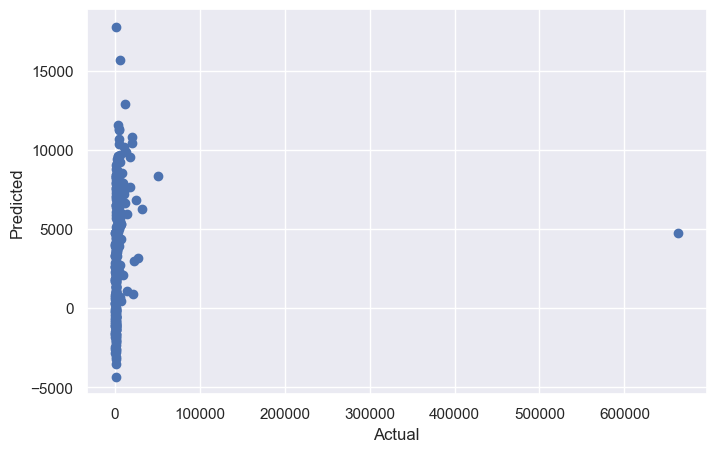

In [149]:
# Plotting the predicted and actual data 
plt.figure(figsize=(8,5))
plt.scatter(y_test,preds_lr)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [150]:
x_test[:10]

article_id  unique_tokens_rate  num_hrefs  num_imgs  num_videos  \
836     7024688            0.814815          0         1           0   
993     7003169            0.477778          4         0           2   
155     7012750            0.735537          8         0           1   
769     7005664            0.635220          7         1           0   
438     7029336            0.604096          8         1           0   
363     7009504            0.592199          5         1           0   
566     7007895            0.569912         12         1           0   
556     7027932            0.441913          9         1           0   
621     7027099            0.596059          4         2           0   
99      7033049            0.529197          7         2           0   

     average_token_length  num_keywords  min_avg_key  max_avg_key  \
836              4.418182             6     2231.676     6283.500   
993              4.691646             5     3016.262    18851.050   
155              4.479675             8     1070.100     7544.234   
769              4.867692             4     2587.467     3602.060   
438              4.708197             5     2219.468     4787.262   
363              5.042105             5     2946.116     3571.914   
566              4.865517             7     2448.250     4744.008   
556              4.669673            10        0.000     3574.499   
621              4.975490             8        0.000     5300.000   
99               4.814882             7        0.000     3578.163   

     avg_avg_key  href_avg_shares  global_subjectivity  \
836     3584.420            0.000             0.761111   
993     6554.751       210300.000             0.432624   
155     3108.700         3000.000             0.696429   
769     3266.430         1532.500             0.377924   
438     3071.467         2400.000             0.388333   
363     3184.781         2355.667             0.420347   
566     3700.804            0.000             0.384303   
556     2197.271         3800.000             0.440975   
621     2832.942         1900.000             0.379196   
99      1695.939         2800.000             0.523940   

     global_sentiment_polarity  global_rate_positive_words  \
836                   0.427778                    0.054545   
993                   0.161028                    0.035627   
155                   0.115909                    0.032520   
769                   0.144006                    0.024615   
438                   0.092500                    0.022951   
363                   0.042674                    0.031579   
566                   0.159601                    0.043103   
556                   0.114292                    0.038331   
621                   0.198951                    0.058824   
99                    0.093535                    0.043557   

     global_rate_negative_words  title_subjectivity  title_sentiment_polarity  \
836                    0.000000              0.0000                      0.00   
993                    0.009828              0.5625                      0.25   
155                    0.016260              0.0000                      0.00   
769                    0.012308              0.0000                      0.00   
438                    0.019672              0.0000                      0.00   
363                    0.014035              0.0000                      0.00   
566                    0.017241              0.5000                      0.15   
556                    0.016911              0.4000                      0.20   
621                    0.000000              0.0000                      0.00   
99                     0.021779              0.8000                     -0.60   

     shares_2  shares_4  data_channel_encoded  num_tokens_title  \
836         0         2                     0                11   
993         1         2                     5                 8   
155         0         1              

In [151]:
preds_lr[:10]

array([[ 4207.44955493],
       [ 5126.97572748],
       [ 1725.52820285],
       [ 2836.49732745],
       [ 7151.63670539],
       [ 5136.68714088],
       [ 3906.42586192],
       [-1043.89963263],
       [ 4339.06379769],
       [-1344.76962038]])

In [152]:
# getting prediction intervals for the test data
lower_vet = []
upper_vet = []

for i in preds_lr:
    lower, upper =  get_prediction_interval(i, y_train.values, linear_reg.predict(x_train).reshape(-1,1))
    lower_vet.append(lower)
    upper_vet.append(upper)

In [153]:
print(lower_vet[:5])
print(upper_vet[:5])
preds_lr.reshape(-1)

[-13872.906307406083, -12953.380134853229, -16354.827659489638, -15243.85853488653, -10928.719156949504]
[22287.805417268988, 23207.331589821842, 19805.884065185433, 20916.85318978854, 25231.992567725567]


array([ 4.20744955e+03,  5.12697573e+03,  1.72552820e+03,  2.83649733e+03,
        7.15163671e+03,  5.13668714e+03,  3.90642586e+03, -1.04389963e+03,
        4.33906380e+03, -1.34476962e+03,  7.91935253e+03,  6.88393225e+03,
       -2.03992548e+02,  4.18919239e+03,  8.40847395e+03,  5.57621317e+03,
        1.13512557e+04,  3.89761823e+03,  5.98393927e+02,  7.18674230e+03,
        6.04029304e+02,  4.72818595e+03,  8.28925156e+03,  9.69115324e+03,
        6.98953427e+03,  3.64523715e+03,  4.44420534e+03,  5.39360584e+03,
        3.28472983e+03,  6.41088016e+03,  3.37445898e+03,  5.84224344e+02,
        8.76705736e+03,  2.69830855e+03,  3.51657358e+03,  6.00656093e+03,
        5.89727258e+03,  6.62638956e+03,  4.13229311e+03,  7.01835801e+03,
        3.35715962e+03,  7.30848871e+03,  1.34932894e+03, -8.51747277e+02,
        8.53133126e+03,  7.62122401e+03,  1.32514169e+03,  7.84446849e+03,
        7.80436064e+03,  4.87721848e+03,  4.05185145e+03,  4.83073636e+03,
        8.30266322e+03,  

In [154]:
df_lr = pd.DataFrame(zip(lower_vet,upper_vet,preds_lr.reshape(-1).tolist()),columns=['lower','upper','mean'])
print(df_lr.shape)
df_lr.head()

(301, 3)


lower         upper         mean
0 -13872.906307  22287.805417  4207.449555
1 -12953.380135  23207.331590  5126.975727
2 -16354.827659  19805.884065  1725.528203
3 -15243.858535  20916.853190  2836.497327
4 -10928.719157  25231.992568  7151.636705

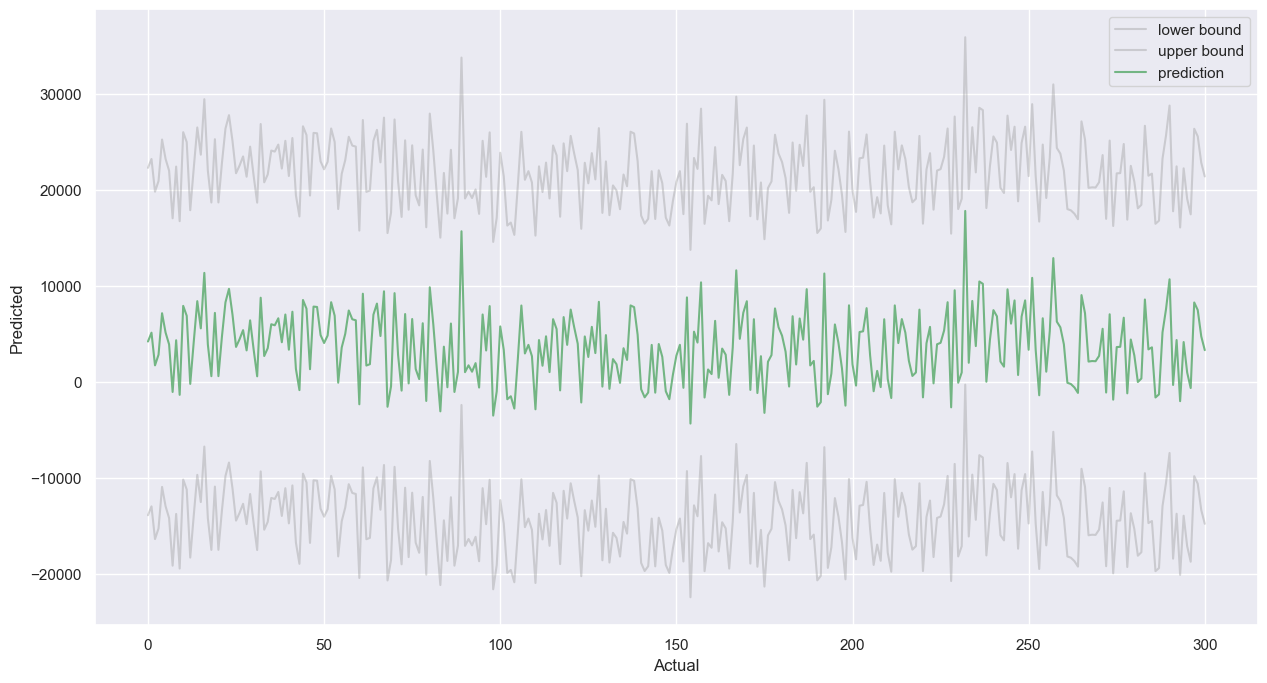

In [155]:
# Plotting the predicted and actual data 
plt.figure(figsize=(15,8))
plt.plot(lower_vet,label='lower bound',alpha=0.3,color='grey')
plt.plot(upper_vet,label='upper bound',alpha=0.3,color='grey')
plt.plot(preds_lr,label='prediction',alpha=0.8,color='g')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()

In [156]:
# Model training
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train,y_train)
print("Training R2 score: "+ str(ridge.score(x_train,y_train)))

Training R2 score: 0.13476311003613395


In [157]:
preds_rid = ridge.predict(x_test)

print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_rid)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_rid)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_rid))))

Test R2 score: 0.0016944032134189602
Test MAE: 5368.308114051996
Test RMSE: 38303.85167087593


In [158]:
pd.DataFrame(zip(ridge.coef_.T, x_train.columns))

0                           1
0   [-0.00016598065713041422]                  article_id
1         [6620.680237988131]          unique_tokens_rate
2         [142.8854567846177]                   num_hrefs
3       [-47.838207241602056]                    num_imgs
4       [-111.35645976361806]                  num_videos
5       [-1537.5731468732467]        average_token_length
6        [-310.5223195608947]                num_keywords
7       [-1.2784046408711296]                 min_avg_key
8      [-0.22524046532782788]                 max_avg_key
9        [1.2854070686931596]                 avg_avg_key
10     [0.009708459234949757]             href_avg_shares
11        [5053.084629345721]         global_subjectivity
12       [-5781.136744624747]   global_sentiment_polarity
13       [-2266.107319961904]  global_rate_positive_words
14       [-2058.449573522566]  global_rate_negative_words
15       [-1661.302891212355]          title_subjectivity
16        [937.9518539016661]    title_sentiment_polarity
17         [4993.31872293815]                    shares_2
18       [-67.15452012629945]                    shares_4
19      [-374.69357977891485]        data_channel_encoded
20       [-63.26758692023791]            num_tokens_title
21       [0.6152315253700013]          num_tokens_content
22       [-4050.426638993266]        links_to_words_ratio
23        [1204.084393513829]       images_to_words_ratio
24      [-1004.9728876132284]       videos_to_words_ratio
25       [-640.6216468725804]                     weekday
26       [1953.9771239460952]                  is_weekend
27       [-16.30921021957573]                 total_links
28                      [0.0]                        year
29       [5068.7671195011035]                       month
30       [136.69341681537367]                         day

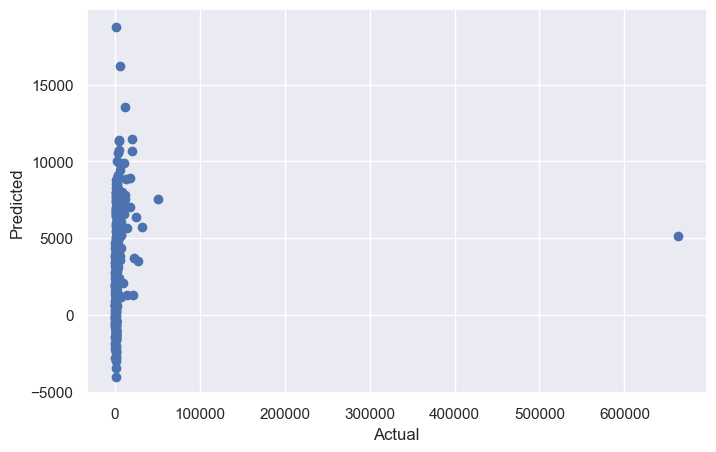

In [159]:
# Plotting the predicted and actual data 
plt.figure(figsize=(8,5))
plt.scatter(y_test,preds_rid)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [160]:
# getting prediction intervals for the test data
lower_vet = []
upper_vet = []

for i in preds_rid:
    lower, upper =  get_prediction_interval(i, y_train.values, ridge.predict(x_train).reshape(-1,1))
    lower_vet.append(lower)
    upper_vet.append(upper)

In [161]:
print(lower_vet[:5])
print(upper_vet[:5])
preds_rid.reshape(-1)

[-14642.968768138931, -12903.11291856232, -17501.23075105154, -15414.971032045692, -10954.066724901853]
[21586.51490675006, 23326.370756326673, 18728.252923837455, 20814.5126428433, 25275.416949987142]


array([ 3.47177307e+03,  5.21162892e+03,  6.13511086e+02,  2.69977081e+03,
        7.16067511e+03,  4.51142462e+03,  4.41663225e+03, -9.58460578e+02,
        4.07788985e+03, -1.25789025e+03,  6.45110346e+03,  6.64264221e+03,
        7.25555282e+00,  4.42397810e+03,  8.53987905e+03,  5.08107633e+03,
        1.13222336e+04,  5.04494970e+03,  1.24975060e+03,  6.08410292e+03,
        5.72437693e+02,  5.11431116e+03,  7.52422433e+03,  9.91467134e+03,
        7.51478677e+03,  3.56015619e+03,  4.60246642e+03,  5.18808310e+03,
        2.24965697e+03,  7.18795128e+03,  3.44085326e+03,  6.12089492e+02,
        7.51996632e+03,  2.88536301e+03,  2.82121261e+03,  6.62272661e+03,
        5.99398504e+03,  7.37083889e+03,  3.54254325e+03,  6.85832160e+03,
        3.24282078e+03,  6.65746316e+03,  1.34516002e+03, -2.93667614e+02,
        8.92879067e+03,  6.93186880e+03,  1.64511826e+03,  7.97597955e+03,
        7.92570520e+03,  4.61590153e+03,  3.18027937e+03,  4.69214188e+03,
        7.27566763e+03,  

In [162]:
df_rid = pd.DataFrame(zip(lower_vet,upper_vet,preds_rid.reshape(-1).tolist()),columns=['lower','upper','mean'])
print(df_rid.shape)
df_rid.head()

(301, 3)


lower         upper         mean
0 -14642.968768  21586.514907  3471.773069
1 -12903.112919  23326.370756  5211.628919
2 -17501.230751  18728.252924   613.511086
3 -15414.971032  20814.512643  2699.770805
4 -10954.066725  25275.416950  7160.675113

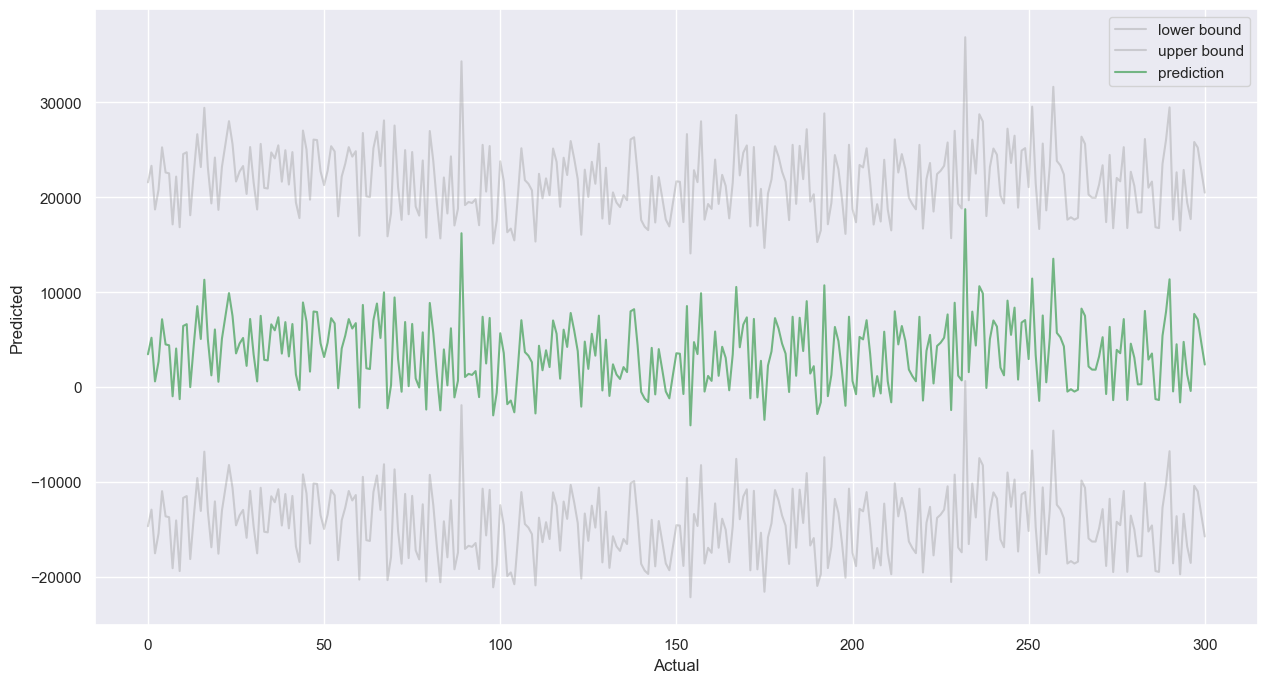

In [163]:
# Plotting the predicted and actual data 
plt.figure(figsize=(15,8))
plt.plot(lower_vet,label='lower bound',alpha=0.3,color='grey')
plt.plot(upper_vet,label='upper bound',alpha=0.3,color='grey')
plt.plot(preds_rid,label='prediction',alpha=0.8,color='g')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()

In [164]:
# Model training
from sklearn.linear_model import Lasso
las = Lasso()
las.fit(x_train,y_train)
print("Training R2 score: "+ str(las.score(x_train,y_train)))

Training R2 score: 0.1377865700321529


In [165]:
# Predicting on the test and evaluating the accuracy
preds_las = las.predict(x_test).reshape(-1,1)

print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_las)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_las)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_las))))

Test R2 score: 0.0005359191479962222
Test MAE: 5434.44762761615
Test RMSE: 38326.07008567777


In [166]:
pd.DataFrame(zip(las.coef_.T, x_train.columns))

0                           1
0      -0.000151                  article_id
1    7937.644096          unique_tokens_rate
2     120.656830                   num_hrefs
3     -91.820608                    num_imgs
4    -154.174485                  num_videos
5   -1669.083885        average_token_length
6    -297.890011                num_keywords
7      -1.246750                 min_avg_key
8      -0.219411                 max_avg_key
9       1.228168                 avg_avg_key
10      0.008964             href_avg_shares
11   7459.455128         global_subjectivity
12 -10124.321955   global_sentiment_polarity
13  -3678.538742  global_rate_positive_words
14 -42276.253255  global_rate_negative_words
15  -1668.915773          title_subjectivity
16   1019.829329    title_sentiment_polarity
17   5060.208671                    shares_2
18    -49.830676                    shares_4
19   -372.610251        data_channel_encoded
20    -75.216622            num_tokens_title
21      0.435389          num_tokens_content
22  -6513.933201        links_to_words_ratio
23   3085.135830       images_to_words_ratio
24     -0.000000       videos_to_words_ratio
25   -658.660774                     weekday
26   2000.451936                  is_weekend
27     19.692601                 total_links
28      0.000000                        year
29   9888.938735                       month
30    147.701320                         day

In [167]:
# getting prediction intervals for the test data
lower_vet = []
upper_vet = []

for i in preds_las:
    lower, upper =  get_prediction_interval(i, y_train.values, las.predict(x_train).reshape(-1,1))
    lower_vet.append(lower)
    upper_vet.append(upper)

In [168]:
print(lower_vet[:5])
print(upper_vet[:5])
preds_las

[-14080.562101185657, -13002.135785329796, -16608.03367135545, -15317.698866245977, -10926.71035299282]
[22085.566522973662, 23163.992838829523, 19558.09495280387, 20848.42975791334, 25239.418271166498]


array([[ 4002.50221089],
       [ 5080.92852675],
       [ 1475.03064072],
       [ 2765.36544583],
       [ 7156.35395909],
       [ 4985.83261261],
       [ 4041.79956704],
       [-1034.23445587],
       [ 4276.06791536],
       [-1346.44245693],
       [ 7539.06027379],
       [ 6810.36203406],
       [ -191.98707226],
       [ 4201.61538651],
       [ 8480.55688102],
       [ 5467.65382581],
       [11358.51043757],
       [ 4173.73610031],
       [  810.25261577],
       [ 6918.72758091],
       [  626.62373859],
       [ 4782.41876471],
       [ 8162.76237576],
       [ 9720.16784798],
       [ 7067.81592719],
       [ 3645.2603614 ],
       [ 4514.04516944],
       [ 5337.08040337],
       [ 2964.40557825],
       [ 6694.2578634 ],
       [ 3426.27136556],
       [  562.53757907],
       [ 8477.57562159],
       [ 2724.0448259 ],
       [ 3291.99128124],
       [ 6192.40754229],
       [ 5909.13274699],
       [ 6891.10064942],
       [ 4005.72941602],
       [ 7018.24195754],


In [169]:
df_las = pd.DataFrame(zip(lower_vet,upper_vet,preds_las.reshape(-1).tolist()),columns=['lower','upper','mean'])
print(df_las.shape)
df_las.head()

(301, 3)


lower         upper         mean
0 -14080.562101  22085.566523  4002.502211
1 -13002.135785  23163.992839  5080.928527
2 -16608.033671  19558.094953  1475.030641
3 -15317.698866  20848.429758  2765.365446
4 -10926.710353  25239.418271  7156.353959

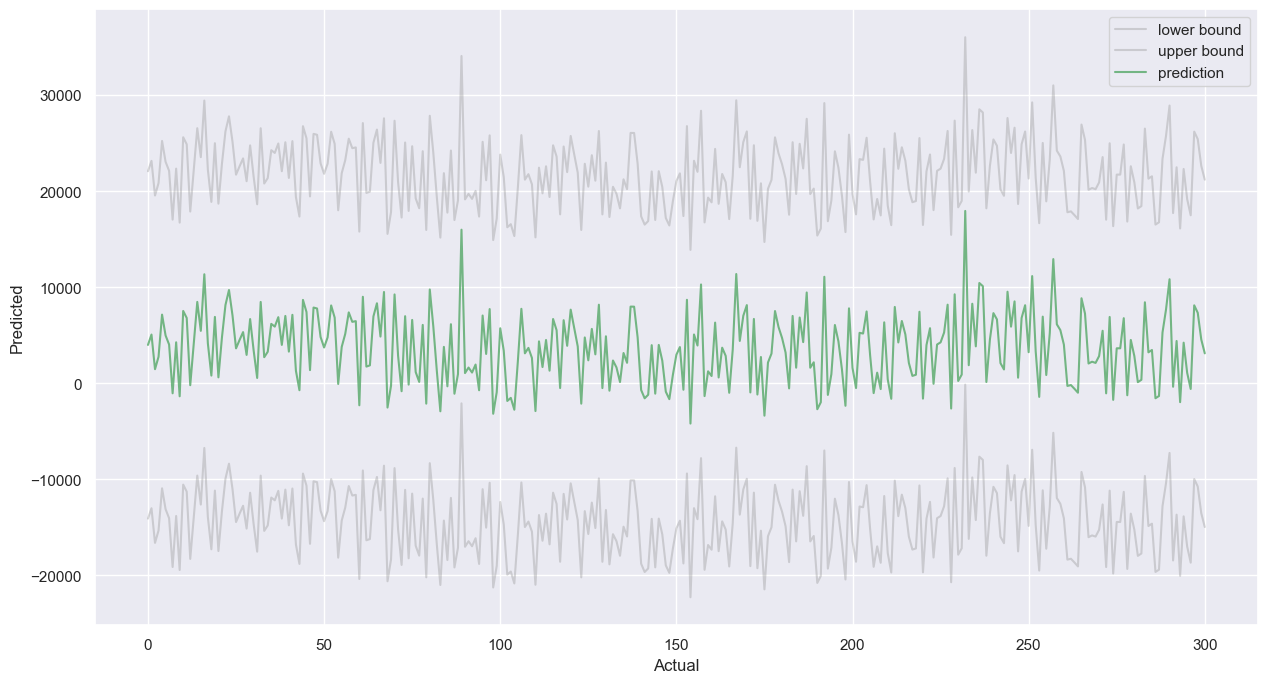

In [170]:
# Plotting the predicted and actual data 
plt.figure(figsize=(15,8))
plt.plot(lower_vet,label='lower bound',alpha=0.3,color='grey')
plt.plot(upper_vet,label='upper bound',alpha=0.3,color='grey')
plt.plot(preds_las,label='prediction',alpha=0.8,color='g')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()

In [171]:
# Model training
from sklearn.ensemble import VotingRegressor

estimators = [('lr',linear_reg),('rid',ridge),('lasso',las)]
voting_ensemble = VotingRegressor(estimators,)
voting_ensemble.fit(x_train,y_train)
print("Training R2 score: "+ str(voting_ensemble.score(x_train,y_train)))

Training R2 score: 0.13746285210910347


In [172]:
# Predicting on the test and evaluating the accuracy
preds_vote = voting_ensemble.predict(x_test)

print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_vote)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_vote)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_vote))))

Test R2 score: 0.0008692738507862785
Test MAE: 5415.915895775033
Test RMSE: 38319.67803945745


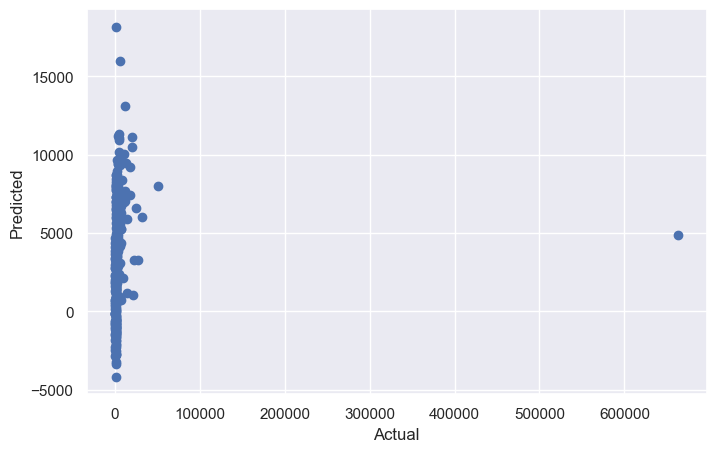

In [173]:
# Plotting the predicted and actual data 
plt.figure(figsize=(8,5))
plt.scatter(y_test,preds_vote)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [174]:
# getting prediction intervals for the test data
lower_vet = []
upper_vet = []

for i in preds_vote.reshape(-1,1):
    lower, upper =  get_prediction_interval(i, y_train.values, voting_ensemble.predict(x_train).reshape(-1,1))
    lower_vet.append(lower)
    upper_vet.append(upper)

In [175]:
print(lower_vet[:5])
print(upper_vet[:5])

[-14192.550357235501, -12946.614244573724, -16815.101992290816, -15319.24744271801, -10930.236709940003]
[21980.366913989514, 23226.30302665129, 19357.8152789342, 20853.669828507005, 25242.68056128501]


In [176]:
preds_vote.reshape(-1)

array([ 3893.90827838,  5139.84439104,  1271.35664332,  2767.21119289,
        7156.22192567,  4877.9814566 ,  4121.61922629, -1012.19822207,
        4231.00718863, -1316.36744145,  7303.17208905,  6778.97883308,
        -129.57468906,  4271.59529164,  8476.30329238,  5374.98110871,
       11343.99990745,  4372.10134141,   886.1323797 ,  6729.8575998 ,
         601.03024541,  4874.97195976,  7992.07942282,  9775.33081086,
        7190.71232151,  3616.88456636,  4520.23897553,  5306.25644815,
        2832.93079327,  6764.36309851,  3413.86120083,   586.28380492,
        8254.86643427,  2769.23879705,  3209.9258234 ,  6273.89836294,
        5933.46345533,  6962.77636578,  3893.52192578,  6964.97385594,
        3302.16229576,  7033.99530561,  1335.68136473,  -619.48658628,
        8716.15031253,  7327.3666319 ,  1449.90332163,  7904.88641503,
        7841.97354641,  4772.93370002,  3655.47486818,  4771.05893468,
        7897.70917141,  6820.90752103,   -83.37325746,  3822.9494758 ,
      

In [177]:
df_vote = pd.DataFrame(zip(lower_vet,upper_vet,preds_vote.reshape(-1).tolist()),columns=['lower','upper','mean'])
print(df_vote.shape)
df_vote.head()

(301, 3)


lower         upper         mean
0 -14192.550357  21980.366914  3893.908278
1 -12946.614245  23226.303027  5139.844391
2 -16815.101992  19357.815279  1271.356643
3 -15319.247443  20853.669829  2767.211193
4 -10930.236710  25242.680561  7156.221926

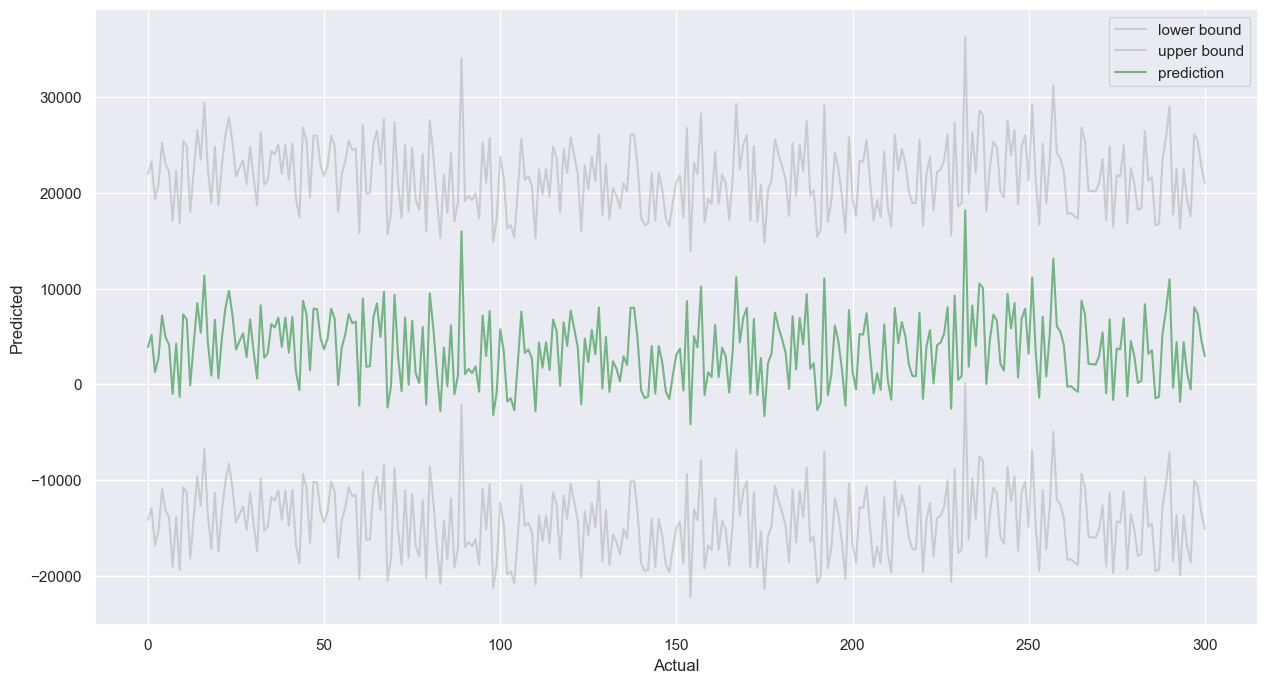

In [178]:
# Plotting the predicted and actual data 
plt.figure(figsize=(15,8))
plt.plot(lower_vet,label='lower bound',alpha=0.3,color='grey')
plt.plot(upper_vet,label='upper bound',alpha=0.3,color='grey')
plt.plot(preds_vote,label='prediction',alpha=0.8,color='g')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()

In [179]:
# Getting the interval estimate for future test usage
interval_est = get_interval_estimate(y_train.values, voting_ensemble.predict(x_train).reshape(-1,1))
print(interval_est)

import pickle
fileName = 'interval_est.pkl'
with open(fileName,'wb') as f:
    pickle.dump(interval_est,f)

18086.458635612507


In [180]:
import joblib

fileName = 'share_prediction_voting.sav'
joblib.dump(voting_ensemble,fileName)

['share_prediction_voting.sav']

In [181]:
# load the model from disk
import joblib
fileName = 'share_prediction_voting.sav'
loaded_model = joblib.load(fileName)
print(loaded_model)

VotingRegressor(estimators=[('lr', LinearRegression()), ('rid', Ridge()),
                            ('lasso', Lasso())])


In [182]:
# testing it on the test data
result = loaded_model.score(x_test, y_test)
print(result)

0.0008692738507862785
